In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.utils import *
from tensorflow.keras import *
from tensorflow.keras.optimizers import *
from tensorflow.keras import models
import os
from tensorflow.keras.preprocessing.image import *
from skimage import io
from tensorflow.keras.callbacks import *
from tensorflow.keras.applications import InceptionV3

2024-04-22 23:36:11.699031: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-22 23:36:11.758104: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-22 23:36:19.109066: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
base_dir = os.path.expanduser("/mnt/d/BDA602/FruitsVegetables")

train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")
validation_dir = os.path.join(base_dir, "validation")

train = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed=100,
    image_size=(224, 224),
    batch_size=256,
    shuffle=True,
    label_mode="int"
)

validation = tf.keras.preprocessing.image_dataset_from_directory(
    validation_dir,
    seed=100,
    image_size=(224, 224),
    batch_size=256,
    shuffle=True,
    label_mode="int"
)

test = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    seed=100,
    image_size=(224, 224),
    batch_size=256,
    shuffle=True,
    label_mode="int"
)

Found 3115 files belonging to 36 classes.


2024-04-22 23:36:42.312953: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:65:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-22 23:36:42.338243: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:65:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-22 23:36:42.338287: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:65:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-22 23:36:42.340649: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:65:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-22 23:36:42.340696: I external/local_xla/xla/stream_executor

Found 351 files belonging to 36 classes.
Found 359 files belonging to 36 classes.


In [3]:
x_train, y_train = next(iter(train))
x_validation, y_validation = next(iter(validation))
x_test, y_test = next(iter(test))

x_train = tf.cast(x_train, 'float32') / 255.0
x_validation = tf.cast(x_validation, 'float32') / 255.0
x_test = tf.cast(x_test, 'float32') / 255.0

y_train_one_hot = to_categorical(y_train, 36)
y_validation_one_hot = to_categorical(y_validation, 36)
y_test_one_hot = to_categorical(y_test, 36)

2024-04-22 23:36:45.454310: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-22 23:36:45.619348: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-22 23:36:46.149366: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-22 23:36:46.880499: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-22 23:36:48.419986: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-22 23:36:49.134842: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-22 23:36:49.498172: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-22 23:36:49.812969: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-04-22 23:36:50.189644: W tensorflow/core/lib/png/png_io.cc:89] PNG 

In [4]:
base_model = InceptionV3(weights="imagenet", include_top=False, input_shape=(224,224,3))
base_model.trainable = False

In [5]:
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
output = Dense(36, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
#model.summary()

In [6]:
train_datagen = ImageDataGenerator(rescale= 1./255,
                   vertical_flip=True,
                   horizontal_flip=True,
                   zoom_range = 0.3,
                   shear_range = 0.3)
validation_datagen = ImageDataGenerator(rescale= 1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size= (224, 224),
        batch_size = 32,
        color_mode= "rgb",
        class_mode= "categorical")

Found 3115 images belonging to 36 classes.


In [8]:
validation_generator = validation_datagen.flow_from_directory(
        validation_dir, 
        target_size= (224, 224),
        batch_size = 36,
        color_mode= "rgb",
        class_mode= "categorical")

Found 351 images belonging to 36 classes.


In [9]:
filepath = '/mnt/d/BDA602/InceptionV3.keras'

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=500,  restore_best_weights=True)

In [10]:
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

In [11]:
hist = model.fit(
        x = train_generator,
        steps_per_epoch = 20,
        epochs=500,
        validation_data = validation_generator,
        validation_steps = 10,
        callbacks=[es, checkpoint])


Epoch 1/500


/mnt/c/Users/spal6554/venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/mnt/c/Users/spal6554/venv/lib/python3.12/site-packages/PIL/Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
I0000 00:00:1713854238.831623   23077 service.cc:145] XLA service 0x7fcd68018370 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1713854238.831669   23077 service.cc:153]   StreamExecutor device (0): NVIDIA RTX A4000, Compute Capability 8.6
2024-04-22 23:37:18.997125: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer,

 1/20 ━━━━━━━━━━━━━━━━━━━━ 7:47 25s/step - accuracy: 0.0000e+00 - loss: 4.2452

I0000 00:00:1713854248.774364   23077 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.0453 - loss: 11.3473
Epoch 1: val_accuracy improved from -inf to 0.24501, saving model to /mnt/d/BDA602/InceptionV3.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 77s 3s/step - accuracy: 0.0474 - loss: 11.2184 - val_accuracy: 0.2450 - val_loss: 3.5786
Epoch 2/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 745ms/step - accuracy: 0.2763 - loss: 3.3039
Epoch 2: val_accuracy did not improve from 0.24501
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 747ms/step - accuracy: 0.2767 - loss: 3.2941 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/500


2024-04-22 23:38:35.909346: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 23:38:35.909557: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
/usr/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 807ms/step - accuracy: 0.3539 - loss: 2.6041
Epoch 3: val_accuracy improved from 0.24501 to 0.46439, saving model to /mnt/d/BDA602/InceptionV3.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.3540 - loss: 2.6008 - val_accuracy: 0.4644 - val_loss: 1.9540
Epoch 4/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 529ms/step - accuracy: 0.3683 - loss: 2.4328
Epoch 4: val_accuracy did not improve from 0.46439
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 530ms/step - accuracy: 0.3697 - loss: 2.4297 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/500


2024-04-22 23:39:12.373854: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 23:39:12.374067: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step - accuracy: 0.4332 - loss: 2.1198

2024-04-22 23:39:21.212732: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 23:39:21.212961: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 5: val_accuracy improved from 0.46439 to 0.51282, saving model to /mnt/d/BDA602/InceptionV3.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 957ms/step - accuracy: 0.4347 - loss: 2.1243 - val_accuracy: 0.5128 - val_loss: 1.7030
Epoch 6/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 754ms/step - accuracy: 0.4045 - loss: 2.1982
Epoch 6: val_accuracy did not improve from 0.51282
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 755ms/step - accuracy: 0.4068 - loss: 2.1908 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/500


2024-04-22 23:39:52.349661: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 23:39:52.349705: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 23:39:52.349722: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 865ms/step - accuracy: 0.5205 - loss: 1.7614
Epoch 7: val_accuracy improved from 0.51282 to 0.64672, saving model to /mnt/d/BDA602/InceptionV3.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.5193 - loss: 1.7654 - val_accuracy: 0.6467 - val_loss: 1.2545
Epoch 8/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 791ms/step - accuracy: 0.5049 - loss: 1.7022
Epoch 8: val_accuracy did not improve from 0.64672
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 792ms/step - accuracy: 0.5055 - loss: 1.7036 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/500


2024-04-22 23:40:34.960611: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 23:40:34.960675: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 879ms/step - accuracy: 0.5288 - loss: 1.7426
Epoch 9: val_accuracy did not improve from 0.64672
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.5281 - loss: 1.7494 - val_accuracy: 0.5726 - val_loss: 1.4332
Epoch 10/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 361ms/step - accuracy: 0.4900 - loss: 1.9044
Epoch 10: val_accuracy did not improve from 0.64672
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 306ms/step - accuracy: 0.4949 - loss: 1.8780 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 11/500


2024-04-22 23:41:06.979211: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 23:41:06.979464: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 23:41:06.989653: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 23:41:06.989691: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 23:41:06.989703: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 804ms/step - accuracy: 0.6027 - loss: 1.5203
Epoch 11: val_accuracy improved from 0.64672 to 0.70940, saving model to /mnt/d/BDA602/InceptionV3.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.6016 - loss: 1.5238 - val_accuracy: 0.7094 - val_loss: 1.0022
Epoch 12/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 915ms/step - accuracy: 0.5804 - loss: 1.4399
Epoch 12: val_accuracy did not improve from 0.70940
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 916ms/step - accuracy: 0.5801 - loss: 1.4386 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 13/500


2024-04-22 23:41:57.155541: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 23:41:57.155718: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 922ms/step - accuracy: 0.6332 - loss: 1.4107
Epoch 13: val_accuracy improved from 0.70940 to 0.72080, saving model to /mnt/d/BDA602/InceptionV3.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.6330 - loss: 1.4105 - val_accuracy: 0.7208 - val_loss: 0.9458
Epoch 14/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 744ms/step - accuracy: 0.6464 - loss: 1.2726
Epoch 14: val_accuracy did not improve from 0.72080
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 745ms/step - accuracy: 0.6462 - loss: 1.2721 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 15/500


2024-04-22 23:42:40.829460: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 23:42:40.829500: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 23:42:40.829513: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453
2024-04-22 23:42:40.829518: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6840101370888662969


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step - accuracy: 0.5975 - loss: 1.3970

2024-04-22 23:42:50.559905: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 23:42:50.560129: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 15: val_accuracy did not improve from 0.72080
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 903ms/step - accuracy: 0.5975 - loss: 1.4040 - val_accuracy: 0.7179 - val_loss: 0.9147
Epoch 16/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 955ms/step - accuracy: 0.6376 - loss: 1.3170
Epoch 16: val_accuracy did not improve from 0.72080
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 956ms/step - accuracy: 0.6371 - loss: 1.3184 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 17/500


2024-04-22 23:43:24.697724: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 23:43:24.697917: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 891ms/step - accuracy: 0.6043 - loss: 1.4889
Epoch 17: val_accuracy improved from 0.72080 to 0.78063, saving model to /mnt/d/BDA602/InceptionV3.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.6046 - loss: 1.4843 - val_accuracy: 0.7806 - val_loss: 0.7518
Epoch 18/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 892ms/step - accuracy: 0.6550 - loss: 1.2093
Epoch 18: val_accuracy did not improve from 0.78063
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 893ms/step - accuracy: 0.6542 - loss: 1.2100 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 19/500


2024-04-22 23:44:09.760889: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 23:44:09.761103: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 856ms/step - accuracy: 0.6056 - loss: 1.4013
Epoch 19: val_accuracy did not improve from 0.78063
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.6065 - loss: 1.3987 - val_accuracy: 0.7464 - val_loss: 0.9126
Epoch 20/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 386ms/step - accuracy: 0.6492 - loss: 1.2406
Epoch 20: val_accuracy did not improve from 0.78063
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 328ms/step - accuracy: 0.6480 - loss: 1.2324 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 21/500


2024-04-22 23:44:41.906399: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 23:44:41.906808: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 23:44:41.919403: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 23:44:41.919439: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 23:44:41.919449: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 801ms/step - accuracy: 0.6565 - loss: 1.1551
Epoch 21: val_accuracy improved from 0.78063 to 0.81197, saving model to /mnt/d/BDA602/InceptionV3.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.6559 - loss: 1.1597 - val_accuracy: 0.8120 - val_loss: 0.6882
Epoch 22/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 821ms/step - accuracy: 0.6657 - loss: 1.1104
Epoch 22: val_accuracy did not improve from 0.81197
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 822ms/step - accuracy: 0.6653 - loss: 1.1127 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 23/500


2024-04-22 23:45:29.885070: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 23:45:29.885288: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 811ms/step - accuracy: 0.6821 - loss: 1.1493
Epoch 23: val_accuracy did not improve from 0.81197
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.6836 - loss: 1.1418 - val_accuracy: 0.7977 - val_loss: 0.6257
Epoch 24/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 715ms/step - accuracy: 0.6981 - loss: 1.0319
Epoch 24: val_accuracy did not improve from 0.81197
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 716ms/step - accuracy: 0.6975 - loss: 1.0336 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 25/500


2024-04-22 23:46:08.240680: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 23:46:08.240806: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


18/20 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step - accuracy: 0.6315 - loss: 1.2023

2024-04-22 23:46:18.222837: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 23:46:18.223182: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 25: val_accuracy did not improve from 0.81197
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 937ms/step - accuracy: 0.6310 - loss: 1.2037 - val_accuracy: 0.7892 - val_loss: 0.7153
Epoch 26/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 770ms/step - accuracy: 0.6959 - loss: 1.0548
Epoch 26: val_accuracy did not improve from 0.81197
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 771ms/step - accuracy: 0.6955 - loss: 1.0574 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 27/500


2024-04-22 23:46:48.322889: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 23:46:48.322948: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453
2024-04-22 23:46:48.322969: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 842ms/step - accuracy: 0.6673 - loss: 1.0387
Epoch 27: val_accuracy did not improve from 0.81197
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.6679 - loss: 1.0378 - val_accuracy: 0.7835 - val_loss: 0.6533
Epoch 28/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 729ms/step - accuracy: 0.6946 - loss: 1.0446
Epoch 28: val_accuracy did not improve from 0.81197
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 730ms/step - accuracy: 0.6942 - loss: 1.0474 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 29/500


2024-04-22 23:47:27.533252: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 23:47:27.533447: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 805ms/step - accuracy: 0.6788 - loss: 1.1133
Epoch 29: val_accuracy improved from 0.81197 to 0.82336, saving model to /mnt/d/BDA602/InceptionV3.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.6787 - loss: 1.1132 - val_accuracy: 0.8234 - val_loss: 0.6005
Epoch 30/500
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - accuracy: 0.6803 - loss: 1.0152
Epoch 30: val_accuracy did not improve from 0.82336
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 299ms/step - accuracy: 0.6800 - loss: 1.0226 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 31/500


2024-04-22 23:47:59.822026: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 23:47:59.822266: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 23:47:59.832473: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 23:47:59.832512: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 23:47:59.832524: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 787ms/step - accuracy: 0.6906 - loss: 1.0461
Epoch 31: val_accuracy did not improve from 0.82336
20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.6907 - loss: 1.0449 - val_accuracy: 0.8006 - val_loss: 0.5734
Epoch 32/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 747ms/step - accuracy: 0.6582 - loss: 1.1831
Epoch 32: val_accuracy did not improve from 0.82336
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 749ms/step - accuracy: 0.6589 - loss: 1.1808 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 33/500


2024-04-22 23:48:44.231330: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 23:48:44.231556: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 749ms/step - accuracy: 0.6915 - loss: 0.9914
Epoch 33: val_accuracy did not improve from 0.82336
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.6923 - loss: 0.9901 - val_accuracy: 0.8091 - val_loss: 0.5410
Epoch 34/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 712ms/step - accuracy: 0.7500 - loss: 0.8987
Epoch 34: val_accuracy did not improve from 0.82336
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 713ms/step - accuracy: 0.7486 - loss: 0.9028 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 35/500


2024-04-22 23:49:21.270406: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 23:49:21.270451: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 23:49:21.270465: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453
2024-04-22 23:49:21.270471: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6840101370888662969


18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step - accuracy: 0.6897 - loss: 1.0367

2024-04-22 23:49:29.582202: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 23:49:29.582416: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 35: val_accuracy improved from 0.82336 to 0.82906, saving model to /mnt/d/BDA602/InceptionV3.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 932ms/step - accuracy: 0.6900 - loss: 1.0398 - val_accuracy: 0.8291 - val_loss: 0.5659
Epoch 36/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 783ms/step - accuracy: 0.7203 - loss: 0.9887
Epoch 36: val_accuracy did not improve from 0.82906
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 784ms/step - accuracy: 0.7200 - loss: 0.9863 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 37/500


2024-04-22 23:50:01.494269: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 23:50:01.494313: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 23:50:01.494326: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453
2024-04-22 23:50:01.494330: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6840101370888662969


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 807ms/step - accuracy: 0.7188 - loss: 1.0156
Epoch 37: val_accuracy did not improve from 0.82906
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7193 - loss: 1.0146 - val_accuracy: 0.7379 - val_loss: 0.7501
Epoch 38/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 793ms/step - accuracy: 0.7017 - loss: 0.9631
Epoch 38: val_accuracy did not improve from 0.82906
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 795ms/step - accuracy: 0.7037 - loss: 0.9593 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 39/500


2024-04-22 23:50:41.058936: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 23:50:41.059078: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 742ms/step - accuracy: 0.7614 - loss: 0.7808
Epoch 39: val_accuracy did not improve from 0.82906
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.7600 - loss: 0.7857 - val_accuracy: 0.8063 - val_loss: 0.6685
Epoch 40/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - accuracy: 0.7074 - loss: 1.0603
Epoch 40: val_accuracy did not improve from 0.82906
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 274ms/step - accuracy: 0.7088 - loss: 1.0440 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 41/500


2024-04-22 23:51:09.636285: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 23:51:09.636609: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 23:51:09.646482: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 23:51:09.646523: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 23:51:09.646536: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 784ms/step - accuracy: 0.7533 - loss: 0.8128
Epoch 41: val_accuracy improved from 0.82906 to 0.86325, saving model to /mnt/d/BDA602/InceptionV3.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.7532 - loss: 0.8130 - val_accuracy: 0.8632 - val_loss: 0.4790
Epoch 42/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 777ms/step - accuracy: 0.7458 - loss: 0.8020
Epoch 42: val_accuracy did not improve from 0.86325
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 777ms/step - accuracy: 0.7445 - loss: 0.8088 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 43/500


2024-04-22 23:51:55.833867: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 23:51:55.833965: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 891ms/step - accuracy: 0.7223 - loss: 0.9489
Epoch 43: val_accuracy improved from 0.86325 to 0.87749, saving model to /mnt/d/BDA602/InceptionV3.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.7234 - loss: 0.9442 - val_accuracy: 0.8775 - val_loss: 0.4082
Epoch 44/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 683ms/step - accuracy: 0.7489 - loss: 0.7668
Epoch 44: val_accuracy did not improve from 0.87749
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 684ms/step - accuracy: 0.7486 - loss: 0.7693 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 45/500


2024-04-22 23:52:36.750245: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 23:52:36.750285: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 23:52:36.750298: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step - accuracy: 0.6956 - loss: 0.9308

2024-04-22 23:52:45.818525: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 23:52:45.818916: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 45: val_accuracy did not improve from 0.87749
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 878ms/step - accuracy: 0.6959 - loss: 0.9280 - val_accuracy: 0.8405 - val_loss: 0.4452
Epoch 46/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 757ms/step - accuracy: 0.7216 - loss: 0.7942
Epoch 46: val_accuracy did not improve from 0.87749
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 757ms/step - accuracy: 0.7223 - loss: 0.7947 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 47/500


2024-04-22 23:53:14.935266: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 23:53:14.935501: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 771ms/step - accuracy: 0.7521 - loss: 0.8598
Epoch 47: val_accuracy did not improve from 0.87749
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7522 - loss: 0.8579 - val_accuracy: 0.8034 - val_loss: 0.6234
Epoch 48/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 757ms/step - accuracy: 0.7058 - loss: 0.8630
Epoch 48: val_accuracy did not improve from 0.87749
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 758ms/step - accuracy: 0.7062 - loss: 0.8648 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 49/500


2024-04-22 23:53:53.617452: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 23:53:53.617495: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 23:53:53.617510: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453
2024-04-22 23:53:53.617516: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6840101370888662969


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 763ms/step - accuracy: 0.7684 - loss: 0.7150
Epoch 49: val_accuracy did not improve from 0.87749
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7690 - loss: 0.7162 - val_accuracy: 0.8376 - val_loss: 0.4709
Epoch 50/500
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step - accuracy: 0.8031 - loss: 0.5901
Epoch 50: val_accuracy did not improve from 0.87749
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 350ms/step - accuracy: 0.8014 - loss: 0.5970 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 51/500


2024-04-22 23:54:24.138643: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 23:54:24.139162: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 23:54:24.149224: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 23:54:24.149280: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 743ms/step - accuracy: 0.7918 - loss: 0.6948
Epoch 51: val_accuracy did not improve from 0.87749
20/20 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.7910 - loss: 0.6966 - val_accuracy: 0.8632 - val_loss: 0.4621
Epoch 52/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 706ms/step - accuracy: 0.6990 - loss: 0.8091
Epoch 52: val_accuracy did not improve from 0.87749
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 708ms/step - accuracy: 0.7002 - loss: 0.8081 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 53/500


2024-04-22 23:55:06.795451: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 23:55:06.795502: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 23:55:06.795518: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453
2024-04-22 23:55:06.795523: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6840101370888662969


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 820ms/step - accuracy: 0.7131 - loss: 0.8808
Epoch 53: val_accuracy did not improve from 0.87749
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7128 - loss: 0.8814 - val_accuracy: 0.8433 - val_loss: 0.4888
Epoch 54/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 727ms/step - accuracy: 0.7582 - loss: 0.8260
Epoch 54: val_accuracy did not improve from 0.87749
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 727ms/step - accuracy: 0.7584 - loss: 0.8243 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 55/500


2024-04-22 23:55:46.633475: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 23:55:46.633516: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 23:55:46.633530: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 467ms/step - accuracy: 0.7880 - loss: 0.7311

2024-04-22 23:55:54.992344: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 23:55:54.992733: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 55: val_accuracy did not improve from 0.87749
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 843ms/step - accuracy: 0.7880 - loss: 0.7276 - val_accuracy: 0.8604 - val_loss: 0.4130
Epoch 56/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 819ms/step - accuracy: 0.7607 - loss: 0.7236
Epoch 56: val_accuracy did not improve from 0.87749
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 820ms/step - accuracy: 0.7604 - loss: 0.7252 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 57/500


2024-04-22 23:56:25.271835: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 23:56:25.272026: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 964ms/step - accuracy: 0.7610 - loss: 0.6898
Epoch 57: val_accuracy did not improve from 0.87749
20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.7608 - loss: 0.6894 - val_accuracy: 0.8490 - val_loss: 0.4211
Epoch 58/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 982ms/step - accuracy: 0.7707 - loss: 0.6305
Epoch 58: val_accuracy did not improve from 0.87749
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 983ms/step - accuracy: 0.7708 - loss: 0.6318 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 59/500


2024-04-22 23:57:14.516205: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 23:57:14.516464: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8257 - loss: 0.5794
Epoch 59: val_accuracy did not improve from 0.87749
20/20 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.8242 - loss: 0.5842 - val_accuracy: 0.8547 - val_loss: 0.4304
Epoch 60/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 471ms/step - accuracy: 0.7865 - loss: 0.6331
Epoch 60: val_accuracy did not improve from 0.87749
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 400ms/step - accuracy: 0.7844 - loss: 0.6357 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 61/500


2024-04-22 23:57:51.059734: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 23:57:51.059916: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-22 23:57:51.070600: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 23:57:51.070637: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-22 23:57:51.070648: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 962ms/step - accuracy: 0.7775 - loss: 0.6579
Epoch 61: val_accuracy did not improve from 0.87749
20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.7769 - loss: 0.6627 - val_accuracy: 0.8234 - val_loss: 0.4724
Epoch 62/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 868ms/step - accuracy: 0.7632 - loss: 0.7596
Epoch 62: val_accuracy did not improve from 0.87749
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 869ms/step - accuracy: 0.7632 - loss: 0.7585 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 63/500


2024-04-22 23:58:42.029257: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 23:58:42.029446: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 967ms/step - accuracy: 0.7553 - loss: 0.8256
Epoch 63: val_accuracy did not improve from 0.87749
20/20 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.7559 - loss: 0.8228 - val_accuracy: 0.8433 - val_loss: 0.4667
Epoch 64/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 719ms/step - accuracy: 0.7884 - loss: 0.7218
Epoch 64: val_accuracy did not improve from 0.87749
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 720ms/step - accuracy: 0.7881 - loss: 0.7222 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 65/500


2024-04-22 23:59:23.601933: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 23:59:23.601980: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453
2024-04-22 23:59:23.601991: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


18/20 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step - accuracy: 0.7693 - loss: 0.7338

2024-04-22 23:59:33.097694: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 23:59:33.098135: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 65: val_accuracy did not improve from 0.87749
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 897ms/step - accuracy: 0.7720 - loss: 0.7272 - val_accuracy: 0.8547 - val_loss: 0.4418
Epoch 66/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 856ms/step - accuracy: 0.7856 - loss: 0.6539
Epoch 66: val_accuracy did not improve from 0.87749
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 857ms/step - accuracy: 0.7855 - loss: 0.6547 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 67/500


2024-04-23 00:00:04.096717: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:00:04.096941: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 801ms/step - accuracy: 0.8028 - loss: 0.6464
Epoch 67: val_accuracy did not improve from 0.87749
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8025 - loss: 0.6468 - val_accuracy: 0.8632 - val_loss: 0.4539
Epoch 68/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 836ms/step - accuracy: 0.7968 - loss: 0.6418
Epoch 68: val_accuracy did not improve from 0.87749
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 837ms/step - accuracy: 0.7967 - loss: 0.6436 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 69/500


2024-04-23 00:00:44.712824: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:00:44.712860: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 00:00:44.712901: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 827ms/step - accuracy: 0.8027 - loss: 0.6492
Epoch 69: val_accuracy did not improve from 0.87749
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8027 - loss: 0.6479 - val_accuracy: 0.8746 - val_loss: 0.4063
Epoch 70/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.7639 - loss: 0.8564
Epoch 70: val_accuracy did not improve from 0.87749
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 270ms/step - accuracy: 0.7659 - loss: 0.8448 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 71/500


2024-04-23 00:01:15.326934: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:01:15.327392: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 00:01:15.339547: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:01:15.339583: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 00:01:15.339594: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 768ms/step - accuracy: 0.8232 - loss: 0.5080
Epoch 71: val_accuracy improved from 0.87749 to 0.88034, saving model to /mnt/d/BDA602/InceptionV3.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.8224 - loss: 0.5113 - val_accuracy: 0.8803 - val_loss: 0.3966
Epoch 72/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 767ms/step - accuracy: 0.8359 - loss: 0.5054
Epoch 72: val_accuracy did not improve from 0.88034
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 768ms/step - accuracy: 0.8352 - loss: 0.5078 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 73/500


2024-04-23 00:02:02.894657: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:02:02.894704: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 00:02:02.894720: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453
2024-04-23 00:02:02.894728: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6840101370888662969


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 745ms/step - accuracy: 0.8502 - loss: 0.4895
Epoch 73: val_accuracy improved from 0.88034 to 0.88604, saving model to /mnt/d/BDA602/InceptionV3.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8493 - loss: 0.4924 - val_accuracy: 0.8860 - val_loss: 0.3652
Epoch 74/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 629ms/step - accuracy: 0.8322 - loss: 0.4766
Epoch 74: val_accuracy did not improve from 0.88604
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 629ms/step - accuracy: 0.8311 - loss: 0.4789 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 75/500


2024-04-23 00:02:39.845625: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:02:39.845858: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 487ms/step - accuracy: 0.8192 - loss: 0.5628

2024-04-23 00:02:49.340553: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:02:49.341115: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 75: val_accuracy did not improve from 0.88604
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 855ms/step - accuracy: 0.8197 - loss: 0.5608 - val_accuracy: 0.8718 - val_loss: 0.3721
Epoch 76/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 844ms/step - accuracy: 0.7975 - loss: 0.6231
Epoch 76: val_accuracy did not improve from 0.88604
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 845ms/step - accuracy: 0.7971 - loss: 0.6240 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 77/500


2024-04-23 00:03:21.207460: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:03:21.207616: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 794ms/step - accuracy: 0.8156 - loss: 0.6233
Epoch 77: val_accuracy did not improve from 0.88604
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8153 - loss: 0.6240 - val_accuracy: 0.8803 - val_loss: 0.3321
Epoch 78/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 779ms/step - accuracy: 0.7995 - loss: 0.5859
Epoch 78: val_accuracy did not improve from 0.88604
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 780ms/step - accuracy: 0.7997 - loss: 0.5855 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 79/500


2024-04-23 00:04:00.365772: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:04:00.365823: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 00:04:00.365868: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 806ms/step - accuracy: 0.7937 - loss: 0.7609
Epoch 79: val_accuracy did not improve from 0.88604
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7944 - loss: 0.7558 - val_accuracy: 0.8803 - val_loss: 0.3954
Epoch 80/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step - accuracy: 0.7630 - loss: 0.7047
Epoch 80: val_accuracy did not improve from 0.88604
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 263ms/step - accuracy: 0.7675 - loss: 0.6985 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 81/500


2024-04-23 00:04:30.053521: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:04:30.053911: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 00:04:30.064224: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:04:30.064263: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 00:04:30.064276: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 767ms/step - accuracy: 0.8352 - loss: 0.5102
Epoch 81: val_accuracy did not improve from 0.88604
20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.8343 - loss: 0.5141 - val_accuracy: 0.8575 - val_loss: 0.4341
Epoch 82/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 781ms/step - accuracy: 0.8006 - loss: 0.6229
Epoch 82: val_accuracy did not improve from 0.88604
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 782ms/step - accuracy: 0.8000 - loss: 0.6248 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 83/500


2024-04-23 00:05:14.838662: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:05:14.838851: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 784ms/step - accuracy: 0.8025 - loss: 0.6600
Epoch 83: val_accuracy did not improve from 0.88604
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8014 - loss: 0.6586 - val_accuracy: 0.8348 - val_loss: 0.5209
Epoch 84/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 653ms/step - accuracy: 0.7700 - loss: 0.7420
Epoch 84: val_accuracy did not improve from 0.88604
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 654ms/step - accuracy: 0.7714 - loss: 0.7378 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 85/500


2024-04-23 00:05:51.861643: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:05:51.861837: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step - accuracy: 0.8171 - loss: 0.5297

2024-04-23 00:06:01.678174: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:06:01.678525: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 85: val_accuracy did not improve from 0.88604
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 908ms/step - accuracy: 0.8146 - loss: 0.5395 - val_accuracy: 0.8803 - val_loss: 0.3423
Epoch 86/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 819ms/step - accuracy: 0.7987 - loss: 0.6835
Epoch 86: val_accuracy did not improve from 0.88604
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 820ms/step - accuracy: 0.7976 - loss: 0.6856 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 87/500


2024-04-23 00:06:32.880737: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:06:32.880971: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 865ms/step - accuracy: 0.8059 - loss: 0.5641
Epoch 87: val_accuracy did not improve from 0.88604
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8056 - loss: 0.5661 - val_accuracy: 0.8803 - val_loss: 0.3773
Epoch 88/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 733ms/step - accuracy: 0.8024 - loss: 0.6028
Epoch 88: val_accuracy did not improve from 0.88604
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 734ms/step - accuracy: 0.8026 - loss: 0.6041 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 89/500


2024-04-23 00:07:12.507425: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:07:12.507575: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 751ms/step - accuracy: 0.8164 - loss: 0.5529
Epoch 89: val_accuracy did not improve from 0.88604
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8162 - loss: 0.5541 - val_accuracy: 0.8746 - val_loss: 0.3843
Epoch 90/500
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.8171 - loss: 0.5957
Epoch 90: val_accuracy did not improve from 0.88604
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 265ms/step - accuracy: 0.8174 - loss: 0.5930 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 91/500


2024-04-23 00:07:41.441753: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:07:41.442044: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 00:07:41.451842: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:07:41.451877: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 00:07:41.451889: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 819ms/step - accuracy: 0.8200 - loss: 0.5742
Epoch 91: val_accuracy did not improve from 0.88604
20/20 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.8192 - loss: 0.5762 - val_accuracy: 0.8689 - val_loss: 0.4096
Epoch 92/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 764ms/step - accuracy: 0.8194 - loss: 0.5601
Epoch 92: val_accuracy did not improve from 0.88604
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 765ms/step - accuracy: 0.8196 - loss: 0.5596 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 93/500


2024-04-23 00:08:27.765641: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:08:27.765851: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 903ms/step - accuracy: 0.8209 - loss: 0.6035
Epoch 93: val_accuracy did not improve from 0.88604
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8207 - loss: 0.6033 - val_accuracy: 0.8718 - val_loss: 0.3966
Epoch 94/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 623ms/step - accuracy: 0.8203 - loss: 0.4840
Epoch 94: val_accuracy did not improve from 0.88604
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 624ms/step - accuracy: 0.8201 - loss: 0.4846 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 95/500


2024-04-23 00:09:06.494273: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:09:06.494317: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 00:09:06.494331: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453
2024-04-23 00:09:06.494337: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6840101370888662969


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 436ms/step - accuracy: 0.8474 - loss: 0.5301

2024-04-23 00:09:14.207858: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:09:14.208248: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 95: val_accuracy did not improve from 0.88604
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 822ms/step - accuracy: 0.8463 - loss: 0.5243 - val_accuracy: 0.8718 - val_loss: 0.3962
Epoch 96/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 824ms/step - accuracy: 0.8257 - loss: 0.5382
Epoch 96: val_accuracy did not improve from 0.88604
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 826ms/step - accuracy: 0.8261 - loss: 0.5371 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 97/500


2024-04-23 00:09:45.910722: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:09:45.910879: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 832ms/step - accuracy: 0.8221 - loss: 0.5062
Epoch 97: val_accuracy did not improve from 0.88604
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8219 - loss: 0.5054 - val_accuracy: 0.8490 - val_loss: 0.4610
Epoch 98/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 716ms/step - accuracy: 0.7952 - loss: 0.5970
Epoch 98: val_accuracy did not improve from 0.88604
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 717ms/step - accuracy: 0.7951 - loss: 0.5984 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 99/500


2024-04-23 00:10:24.792500: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:10:24.792540: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 00:10:24.792581: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 803ms/step - accuracy: 0.7645 - loss: 0.8319
Epoch 99: val_accuracy did not improve from 0.88604
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7641 - loss: 0.8293 - val_accuracy: 0.8718 - val_loss: 0.4120
Epoch 100/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 342ms/step - accuracy: 0.8074 - loss: 0.5820
Epoch 100: val_accuracy did not improve from 0.88604
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 291ms/step - accuracy: 0.8029 - loss: 0.5942 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 101/500


2024-04-23 00:10:54.983215: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:10:54.983487: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 00:10:54.993383: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:10:54.993419: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 00:10:54.993431: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453
2024-04-23 00:10:54.993437: I tensorflow/core/framework/local_re

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 822ms/step - accuracy: 0.8376 - loss: 0.5406
Epoch 101: val_accuracy did not improve from 0.88604
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8375 - loss: 0.5414 - val_accuracy: 0.8661 - val_loss: 0.4266
Epoch 102/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 747ms/step - accuracy: 0.8129 - loss: 0.5240
Epoch 102: val_accuracy did not improve from 0.88604
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 748ms/step - accuracy: 0.8124 - loss: 0.5276 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 103/500


2024-04-23 00:11:40.056057: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:11:40.056110: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 00:11:40.056123: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 980ms/step - accuracy: 0.7955 - loss: 0.7350
Epoch 103: val_accuracy did not improve from 0.88604
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.7958 - loss: 0.7325 - val_accuracy: 0.8718 - val_loss: 0.3886
Epoch 104/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 837ms/step - accuracy: 0.8113 - loss: 0.5812
Epoch 104: val_accuracy did not improve from 0.88604
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 838ms/step - accuracy: 0.8109 - loss: 0.5827 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 105/500


2024-04-23 00:12:26.738800: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:12:26.739045: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


18/20 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step - accuracy: 0.8274 - loss: 0.5257

2024-04-23 00:12:38.958791: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:12:38.958966: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 105: val_accuracy did not improve from 0.88604
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8279 - loss: 0.5261 - val_accuracy: 0.8319 - val_loss: 0.4792
Epoch 106/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 975ms/step - accuracy: 0.8259 - loss: 0.5378
Epoch 106: val_accuracy did not improve from 0.88604
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 976ms/step - accuracy: 0.8260 - loss: 0.5380 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 107/500


2024-04-23 00:13:13.100533: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:13:13.100704: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 884ms/step - accuracy: 0.8292 - loss: 0.5676
Epoch 107: val_accuracy did not improve from 0.88604
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8286 - loss: 0.5686 - val_accuracy: 0.8575 - val_loss: 0.3908
Epoch 108/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 840ms/step - accuracy: 0.8381 - loss: 0.4591
Epoch 108: val_accuracy did not improve from 0.88604
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 841ms/step - accuracy: 0.8381 - loss: 0.4616 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 109/500


2024-04-23 00:13:55.219618: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:13:55.219783: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 861ms/step - accuracy: 0.8317 - loss: 0.5136
Epoch 109: val_accuracy did not improve from 0.88604
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8306 - loss: 0.5172 - val_accuracy: 0.8832 - val_loss: 0.3869
Epoch 110/500
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.8174 - loss: 0.5651
Epoch 110: val_accuracy did not improve from 0.88604
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 316ms/step - accuracy: 0.8178 - loss: 0.5622 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 111/500


2024-04-23 00:14:27.314540: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:14:27.314885: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 00:14:27.324734: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:14:27.324777: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 895ms/step - accuracy: 0.8221 - loss: 0.6038
Epoch 111: val_accuracy did not improve from 0.88604
20/20 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.8214 - loss: 0.6066 - val_accuracy: 0.8433 - val_loss: 0.5061
Epoch 112/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 801ms/step - accuracy: 0.8296 - loss: 0.5189
Epoch 112: val_accuracy did not improve from 0.88604
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 802ms/step - accuracy: 0.8295 - loss: 0.5190 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 113/500


2024-04-23 00:15:14.356687: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:15:14.356733: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453
2024-04-23 00:15:14.356745: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 798ms/step - accuracy: 0.8567 - loss: 0.3117
Epoch 113: val_accuracy did not improve from 0.88604
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8563 - loss: 0.3159 - val_accuracy: 0.8803 - val_loss: 0.3456
Epoch 114/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 718ms/step - accuracy: 0.8810 - loss: 0.4420
Epoch 114: val_accuracy did not improve from 0.88604
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 719ms/step - accuracy: 0.8802 - loss: 0.4455 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 115/500


2024-04-23 00:15:53.800093: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:15:53.800142: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 00:15:53.800156: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453
2024-04-23 00:15:53.800162: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6840101370888662969


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step - accuracy: 0.8724 - loss: 0.4355

2024-04-23 00:16:04.128645: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:16:04.128857: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 115: val_accuracy did not improve from 0.88604
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 951ms/step - accuracy: 0.8700 - loss: 0.4426 - val_accuracy: 0.8832 - val_loss: 0.4018
Epoch 116/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 848ms/step - accuracy: 0.8419 - loss: 0.5582
Epoch 116: val_accuracy did not improve from 0.88604
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 850ms/step - accuracy: 0.8424 - loss: 0.5556 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 117/500


2024-04-23 00:16:35.835075: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:16:35.835230: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 873ms/step - accuracy: 0.8313 - loss: 0.4590
Epoch 117: val_accuracy improved from 0.88604 to 0.89459, saving model to /mnt/d/BDA602/InceptionV3.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.8319 - loss: 0.4588 - val_accuracy: 0.8946 - val_loss: 0.3738
Epoch 118/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 724ms/step - accuracy: 0.8585 - loss: 0.4651
Epoch 118: val_accuracy did not improve from 0.89459
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 725ms/step - accuracy: 0.8581 - loss: 0.4672 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 119/500


2024-04-23 00:17:17.482075: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:17:17.482307: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 846ms/step - accuracy: 0.8110 - loss: 0.5325
Epoch 119: val_accuracy did not improve from 0.89459
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8113 - loss: 0.5314 - val_accuracy: 0.8860 - val_loss: 0.3563
Epoch 120/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 359ms/step - accuracy: 0.8196 - loss: 0.5226
Epoch 120: val_accuracy did not improve from 0.89459
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 305ms/step - accuracy: 0.8172 - loss: 0.5316 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 121/500


2024-04-23 00:17:48.566394: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:17:48.566768: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 00:17:48.579284: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:17:48.579320: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 00:17:48.579333: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453
2024-04-23 00:17:48.579338: I tensorflow/core/framework/local_re

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 754ms/step - accuracy: 0.8480 - loss: 0.4614
Epoch 121: val_accuracy did not improve from 0.89459
20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.8482 - loss: 0.4603 - val_accuracy: 0.8746 - val_loss: 0.3836
Epoch 122/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 674ms/step - accuracy: 0.8543 - loss: 0.4268
Epoch 122: val_accuracy did not improve from 0.89459
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 675ms/step - accuracy: 0.8538 - loss: 0.4285 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 123/500


2024-04-23 00:18:31.039986: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:18:31.040035: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 00:18:31.040046: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 818ms/step - accuracy: 0.8903 - loss: 0.3383
Epoch 123: val_accuracy did not improve from 0.89459
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8896 - loss: 0.3398 - val_accuracy: 0.8746 - val_loss: 0.3702
Epoch 124/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 691ms/step - accuracy: 0.8633 - loss: 0.4358
Epoch 124: val_accuracy did not improve from 0.89459
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 692ms/step - accuracy: 0.8636 - loss: 0.4355 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 125/500


2024-04-23 00:19:09.354505: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:19:09.354548: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 00:19:09.354562: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453
2024-04-23 00:19:09.354590: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6840101370888662969


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step - accuracy: 0.8930 - loss: 0.3315

2024-04-23 00:19:18.680760: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:19:18.681224: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 125: val_accuracy did not improve from 0.89459
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 903ms/step - accuracy: 0.8913 - loss: 0.3388 - val_accuracy: 0.8632 - val_loss: 0.4511
Epoch 126/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 884ms/step - accuracy: 0.8221 - loss: 0.6352
Epoch 126: val_accuracy did not improve from 0.89459
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 885ms/step - accuracy: 0.8224 - loss: 0.6343 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 127/500


2024-04-23 00:19:51.219285: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:19:51.219333: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 00:19:51.219346: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 851ms/step - accuracy: 0.7939 - loss: 0.5950
Epoch 127: val_accuracy did not improve from 0.89459
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7947 - loss: 0.5990 - val_accuracy: 0.8661 - val_loss: 0.4238
Epoch 128/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 751ms/step - accuracy: 0.8237 - loss: 0.5321
Epoch 128: val_accuracy did not improve from 0.89459
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 752ms/step - accuracy: 0.8235 - loss: 0.5341 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 129/500


2024-04-23 00:20:31.264408: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:20:31.264456: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 00:20:31.264468: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 776ms/step - accuracy: 0.8097 - loss: 0.5450
Epoch 129: val_accuracy did not improve from 0.89459
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8100 - loss: 0.5464 - val_accuracy: 0.8746 - val_loss: 0.3977
Epoch 130/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 373ms/step - accuracy: 0.8195 - loss: 0.5298
Epoch 130: val_accuracy did not improve from 0.89459
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 317ms/step - accuracy: 0.8237 - loss: 0.5236 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 131/500


2024-04-23 00:21:01.798610: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:21:01.798951: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 00:21:01.808947: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:21:01.808985: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 00:21:01.808996: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 882ms/step - accuracy: 0.8581 - loss: 0.4340
Epoch 131: val_accuracy improved from 0.89459 to 0.90028, saving model to /mnt/d/BDA602/InceptionV3.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.8581 - loss: 0.4344 - val_accuracy: 0.9003 - val_loss: 0.3371
Epoch 132/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 759ms/step - accuracy: 0.9016 - loss: 0.2894
Epoch 132: val_accuracy did not improve from 0.90028
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 760ms/step - accuracy: 0.9001 - loss: 0.2925 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 133/500


2024-04-23 00:21:49.577511: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:21:49.577837: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 813ms/step - accuracy: 0.8362 - loss: 0.5421
Epoch 133: val_accuracy did not improve from 0.90028
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8353 - loss: 0.5440 - val_accuracy: 0.8661 - val_loss: 0.4292
Epoch 134/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 609ms/step - accuracy: 0.8270 - loss: 0.5932
Epoch 134: val_accuracy did not improve from 0.90028
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 610ms/step - accuracy: 0.8265 - loss: 0.5929 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 135/500


2024-04-23 00:22:26.356528: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:22:26.356696: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step - accuracy: 0.8637 - loss: 0.4876

2024-04-23 00:22:35.362771: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:22:35.363197: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 135: val_accuracy did not improve from 0.90028
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 886ms/step - accuracy: 0.8641 - loss: 0.4891 - val_accuracy: 0.8604 - val_loss: 0.3948
Epoch 136/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 781ms/step - accuracy: 0.8283 - loss: 0.4933
Epoch 136: val_accuracy did not improve from 0.90028
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 781ms/step - accuracy: 0.8279 - loss: 0.4945 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 137/500


2024-04-23 00:23:05.818537: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:23:05.818585: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 00:23:05.818597: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453
2024-04-23 00:23:05.818602: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6840101370888662969


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 789ms/step - accuracy: 0.8620 - loss: 0.4725
Epoch 137: val_accuracy did not improve from 0.90028
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8627 - loss: 0.4701 - val_accuracy: 0.8860 - val_loss: 0.3632
Epoch 138/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 752ms/step - accuracy: 0.8540 - loss: 0.5231
Epoch 138: val_accuracy did not improve from 0.90028
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 753ms/step - accuracy: 0.8537 - loss: 0.5236 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 139/500


2024-04-23 00:23:44.313794: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:23:44.314014: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 824ms/step - accuracy: 0.8422 - loss: 0.4617
Epoch 139: val_accuracy did not improve from 0.90028
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8432 - loss: 0.4593 - val_accuracy: 0.8775 - val_loss: 0.3736
Epoch 140/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 334ms/step - accuracy: 0.8408 - loss: 0.4640
Epoch 140: val_accuracy did not improve from 0.90028
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 284ms/step - accuracy: 0.8402 - loss: 0.4643 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 141/500


2024-04-23 00:24:15.308306: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:24:15.308800: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 00:24:15.322138: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:24:15.322174: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 00:24:15.322185: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 852ms/step - accuracy: 0.8308 - loss: 0.5975
Epoch 141: val_accuracy improved from 0.90028 to 0.90598, saving model to /mnt/d/BDA602/InceptionV3.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.8319 - loss: 0.5935 - val_accuracy: 0.9060 - val_loss: 0.3368
Epoch 142/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 782ms/step - accuracy: 0.8690 - loss: 0.4212
Epoch 142: val_accuracy did not improve from 0.90598
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 783ms/step - accuracy: 0.8686 - loss: 0.4221 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 143/500


2024-04-23 00:25:03.453298: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:25:03.453497: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 865ms/step - accuracy: 0.8055 - loss: 0.5389
Epoch 143: val_accuracy did not improve from 0.90598
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8068 - loss: 0.5354 - val_accuracy: 0.8661 - val_loss: 0.4803
Epoch 144/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 631ms/step - accuracy: 0.8131 - loss: 0.5003
Epoch 144: val_accuracy did not improve from 0.90598
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 632ms/step - accuracy: 0.8143 - loss: 0.4995 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 145/500


2024-04-23 00:25:41.508081: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:25:41.508327: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 473ms/step - accuracy: 0.8656 - loss: 0.3746

2024-04-23 00:25:49.923090: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:25:49.923423: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 145: val_accuracy did not improve from 0.90598
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 847ms/step - accuracy: 0.8638 - loss: 0.3806 - val_accuracy: 0.8917 - val_loss: 0.3459
Epoch 146/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 787ms/step - accuracy: 0.8649 - loss: 0.3642
Epoch 146: val_accuracy did not improve from 0.90598
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 788ms/step - accuracy: 0.8644 - loss: 0.3664 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 147/500


2024-04-23 00:26:19.888655: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:26:19.888700: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 00:26:19.888713: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453
2024-04-23 00:26:19.888719: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6840101370888662969


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 790ms/step - accuracy: 0.8813 - loss: 0.3925
Epoch 147: val_accuracy improved from 0.90598 to 0.90883, saving model to /mnt/d/BDA602/InceptionV3.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8812 - loss: 0.3930 - val_accuracy: 0.9088 - val_loss: 0.3089
Epoch 148/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 898ms/step - accuracy: 0.8523 - loss: 0.4858
Epoch 148: val_accuracy did not improve from 0.90883
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 899ms/step - accuracy: 0.8529 - loss: 0.4829 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 149/500


2024-04-23 00:27:03.356016: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:27:03.356214: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 904ms/step - accuracy: 0.8490 - loss: 0.4281
Epoch 149: val_accuracy did not improve from 0.90883
20/20 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.8495 - loss: 0.4280 - val_accuracy: 0.8917 - val_loss: 0.3441
Epoch 150/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 459ms/step - accuracy: 0.8310 - loss: 0.4683
Epoch 150: val_accuracy did not improve from 0.90883
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 389ms/step - accuracy: 0.8342 - loss: 0.4625 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 151/500


2024-04-23 00:27:40.075918: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:27:40.076214: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 00:27:40.090074: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:27:40.090118: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 00:27:40.090130: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 853ms/step - accuracy: 0.8870 - loss: 0.4098
Epoch 151: val_accuracy did not improve from 0.90883
20/20 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.8866 - loss: 0.4090 - val_accuracy: 0.9003 - val_loss: 0.3105
Epoch 152/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 746ms/step - accuracy: 0.8196 - loss: 0.5111
Epoch 152: val_accuracy did not improve from 0.90883
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 747ms/step - accuracy: 0.8205 - loss: 0.5106 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 153/500


2024-04-23 00:28:27.240122: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:28:27.240166: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 00:28:27.240179: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453
2024-04-23 00:28:27.240184: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6840101370888662969


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 856ms/step - accuracy: 0.8611 - loss: 0.4729
Epoch 153: val_accuracy did not improve from 0.90883
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8609 - loss: 0.4716 - val_accuracy: 0.8604 - val_loss: 0.4774
Epoch 154/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 737ms/step - accuracy: 0.8479 - loss: 0.5287
Epoch 154: val_accuracy did not improve from 0.90883
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 738ms/step - accuracy: 0.8485 - loss: 0.5272 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 155/500


2024-04-23 00:29:06.838879: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:29:06.839003: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step - accuracy: 0.8803 - loss: 0.3539

2024-04-23 00:29:16.518509: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:29:16.518794: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 155: val_accuracy did not improve from 0.90883
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 931ms/step - accuracy: 0.8769 - loss: 0.3588 - val_accuracy: 0.8889 - val_loss: 0.3629
Epoch 156/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 810ms/step - accuracy: 0.8671 - loss: 0.3302
Epoch 156: val_accuracy did not improve from 0.90883
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 811ms/step - accuracy: 0.8669 - loss: 0.3317 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 157/500


2024-04-23 00:29:47.444584: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:29:47.444623: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 00:29:47.444634: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453
2024-04-23 00:29:47.444640: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6840101370888662969


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 815ms/step - accuracy: 0.8781 - loss: 0.3798
Epoch 157: val_accuracy did not improve from 0.90883
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8775 - loss: 0.3803 - val_accuracy: 0.8917 - val_loss: 0.4790
Epoch 158/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 744ms/step - accuracy: 0.8403 - loss: 0.4643
Epoch 158: val_accuracy did not improve from 0.90883
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 745ms/step - accuracy: 0.8405 - loss: 0.4662 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 159/500


2024-04-23 00:30:26.619376: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:30:26.619438: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 822ms/step - accuracy: 0.8393 - loss: 0.5098
Epoch 159: val_accuracy did not improve from 0.90883
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8394 - loss: 0.5108 - val_accuracy: 0.8746 - val_loss: 0.4440
Epoch 160/500
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step - accuracy: 0.8321 - loss: 0.5906
Epoch 160: val_accuracy did not improve from 0.90883
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 302ms/step - accuracy: 0.8350 - loss: 0.5799 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 161/500


2024-04-23 00:30:57.371073: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:30:57.371418: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 00:30:57.390836: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:30:57.390917: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453
2024-04-23 00:30:57.390932: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 777ms/step - accuracy: 0.8670 - loss: 0.4854
Epoch 161: val_accuracy did not improve from 0.90883
20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.8661 - loss: 0.4853 - val_accuracy: 0.9003 - val_loss: 0.4037
Epoch 162/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 742ms/step - accuracy: 0.8295 - loss: 0.4718
Epoch 162: val_accuracy did not improve from 0.90883
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 743ms/step - accuracy: 0.8299 - loss: 0.4713 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 163/500


2024-04-23 00:31:41.850325: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:31:41.850397: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 827ms/step - accuracy: 0.8181 - loss: 0.5951
Epoch 163: val_accuracy did not improve from 0.90883
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8191 - loss: 0.5926 - val_accuracy: 0.8946 - val_loss: 0.3467
Epoch 164/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 652ms/step - accuracy: 0.8658 - loss: 0.4578
Epoch 164: val_accuracy did not improve from 0.90883
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 653ms/step - accuracy: 0.8643 - loss: 0.4596 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 165/500


2024-04-23 00:32:19.904132: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:32:19.904344: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step - accuracy: 0.8527 - loss: 0.4582

2024-04-23 00:32:29.768219: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:32:29.768612: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 165: val_accuracy did not improve from 0.90883
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 924ms/step - accuracy: 0.8537 - loss: 0.4535 - val_accuracy: 0.9031 - val_loss: 0.3329
Epoch 166/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 842ms/step - accuracy: 0.8400 - loss: 0.4577
Epoch 166: val_accuracy did not improve from 0.90883
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 843ms/step - accuracy: 0.8407 - loss: 0.4566 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 167/500


2024-04-23 00:33:00.791720: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:33:00.791768: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 00:33:00.791780: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 808ms/step - accuracy: 0.8563 - loss: 0.4748
Epoch 167: val_accuracy improved from 0.90883 to 0.91168, saving model to /mnt/d/BDA602/InceptionV3.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8567 - loss: 0.4719 - val_accuracy: 0.9117 - val_loss: 0.2973
Epoch 168/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 790ms/step - accuracy: 0.8849 - loss: 0.3739
Epoch 168: val_accuracy did not improve from 0.91168
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 790ms/step - accuracy: 0.8848 - loss: 0.3734 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 169/500


2024-04-23 00:33:42.399546: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:33:42.399608: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453
2024-04-23 00:33:42.399632: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 707ms/step - accuracy: 0.8880 - loss: 0.3420
Epoch 169: val_accuracy did not improve from 0.91168
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.8878 - loss: 0.3439 - val_accuracy: 0.9060 - val_loss: 0.2996
Epoch 170/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 371ms/step - accuracy: 0.8745 - loss: 0.4068
Epoch 170: val_accuracy did not improve from 0.91168
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 315ms/step - accuracy: 0.8736 - loss: 0.4060 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 171/500


2024-04-23 00:34:11.500379: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:34:11.500802: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 00:34:11.513149: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:34:11.513187: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 00:34:11.513198: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 864ms/step - accuracy: 0.8875 - loss: 0.3652
Epoch 171: val_accuracy improved from 0.91168 to 0.92023, saving model to /mnt/d/BDA602/InceptionV3.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.8871 - loss: 0.3665 - val_accuracy: 0.9202 - val_loss: 0.3269
Epoch 172/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 791ms/step - accuracy: 0.8845 - loss: 0.3541
Epoch 172: val_accuracy did not improve from 0.92023
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 792ms/step - accuracy: 0.8849 - loss: 0.3532 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 173/500


2024-04-23 00:35:00.203029: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:35:00.203245: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 847ms/step - accuracy: 0.8665 - loss: 0.4005
Epoch 173: val_accuracy did not improve from 0.92023
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8660 - loss: 0.4020 - val_accuracy: 0.8775 - val_loss: 0.3619
Epoch 174/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 596ms/step - accuracy: 0.8392 - loss: 0.4754
Epoch 174: val_accuracy did not improve from 0.92023
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 597ms/step - accuracy: 0.8386 - loss: 0.4768 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 175/500


2024-04-23 00:35:37.088509: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:35:37.088550: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 00:35:37.088587: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step - accuracy: 0.8434 - loss: 0.5535

2024-04-23 00:35:46.848757: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:35:46.848986: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 175: val_accuracy did not improve from 0.92023
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 905ms/step - accuracy: 0.8437 - loss: 0.5438 - val_accuracy: 0.8917 - val_loss: 0.3254
Epoch 176/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 825ms/step - accuracy: 0.8885 - loss: 0.4112
Epoch 176: val_accuracy did not improve from 0.92023
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 826ms/step - accuracy: 0.8880 - loss: 0.4112 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 177/500


2024-04-23 00:36:17.213783: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:36:17.213830: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 00:36:17.213845: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 850ms/step - accuracy: 0.8720 - loss: 0.4223
Epoch 177: val_accuracy did not improve from 0.92023
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8717 - loss: 0.4215 - val_accuracy: 0.9088 - val_loss: 0.3001
Epoch 178/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 735ms/step - accuracy: 0.8768 - loss: 0.3438
Epoch 178: val_accuracy did not improve from 0.92023
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 736ms/step - accuracy: 0.8773 - loss: 0.3447 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 179/500


2024-04-23 00:36:56.682109: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:36:56.682152: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 00:36:56.682165: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453
2024-04-23 00:36:56.682171: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6840101370888662969


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 815ms/step - accuracy: 0.8557 - loss: 0.4523
Epoch 179: val_accuracy did not improve from 0.92023
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8557 - loss: 0.4535 - val_accuracy: 0.8860 - val_loss: 0.3377
Epoch 180/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 380ms/step - accuracy: 0.8513 - loss: 0.5645
Epoch 180: val_accuracy did not improve from 0.92023
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 323ms/step - accuracy: 0.8517 - loss: 0.5482 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 181/500


2024-04-23 00:37:27.889344: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:37:27.889717: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 00:37:27.904695: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:37:27.904750: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 842ms/step - accuracy: 0.8556 - loss: 0.3965
Epoch 181: val_accuracy did not improve from 0.92023
20/20 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.8563 - loss: 0.3940 - val_accuracy: 0.9145 - val_loss: 0.2518
Epoch 182/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 751ms/step - accuracy: 0.8694 - loss: 0.3769
Epoch 182: val_accuracy did not improve from 0.92023
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 752ms/step - accuracy: 0.8697 - loss: 0.3765 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 183/500


2024-04-23 00:38:14.928541: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:38:14.928582: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 00:38:14.928594: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453
2024-04-23 00:38:14.928600: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6840101370888662969


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 799ms/step - accuracy: 0.8728 - loss: 0.3840
Epoch 183: val_accuracy did not improve from 0.92023
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8725 - loss: 0.3849 - val_accuracy: 0.9088 - val_loss: 0.3030
Epoch 184/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 610ms/step - accuracy: 0.8653 - loss: 0.4385
Epoch 184: val_accuracy did not improve from 0.92023
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 611ms/step - accuracy: 0.8655 - loss: 0.4363 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 185/500


2024-04-23 00:38:51.214638: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:38:51.214705: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 480ms/step - accuracy: 0.8569 - loss: 0.4547

2024-04-23 00:38:59.353933: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:38:59.354269: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 185: val_accuracy did not improve from 0.92023
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 857ms/step - accuracy: 0.8596 - loss: 0.4466 - val_accuracy: 0.9060 - val_loss: 0.3000
Epoch 186/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 829ms/step - accuracy: 0.8729 - loss: 0.3559
Epoch 186: val_accuracy did not improve from 0.92023
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 830ms/step - accuracy: 0.8730 - loss: 0.3558 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 187/500


2024-04-23 00:39:30.331662: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:39:30.331866: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 776ms/step - accuracy: 0.8804 - loss: 0.3702
Epoch 187: val_accuracy did not improve from 0.92023
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8792 - loss: 0.3734 - val_accuracy: 0.8889 - val_loss: 0.3836
Epoch 188/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 722ms/step - accuracy: 0.8398 - loss: 0.5311
Epoch 188: val_accuracy did not improve from 0.92023
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 723ms/step - accuracy: 0.8404 - loss: 0.5284 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 189/500


2024-04-23 00:40:07.906185: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:40:07.906384: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 803ms/step - accuracy: 0.8908 - loss: 0.3494
Epoch 189: val_accuracy did not improve from 0.92023
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8911 - loss: 0.3475 - val_accuracy: 0.9060 - val_loss: 0.2908
Epoch 190/500
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step - accuracy: 0.8607 - loss: 0.4099
Epoch 190: val_accuracy did not improve from 0.92023
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 357ms/step - accuracy: 0.8606 - loss: 0.4137 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 191/500


2024-04-23 00:40:39.512016: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:40:39.512447: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 00:40:39.522783: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:40:39.522820: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 00:40:39.522832: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 791ms/step - accuracy: 0.8931 - loss: 0.3310
Epoch 191: val_accuracy did not improve from 0.92023
20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.8925 - loss: 0.3336 - val_accuracy: 0.9031 - val_loss: 0.2630
Epoch 192/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 840ms/step - accuracy: 0.8700 - loss: 0.3951
Epoch 192: val_accuracy did not improve from 0.92023
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 842ms/step - accuracy: 0.8701 - loss: 0.3939 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 193/500


2024-04-23 00:41:25.990538: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:41:25.990605: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 813ms/step - accuracy: 0.8812 - loss: 0.3223
Epoch 193: val_accuracy did not improve from 0.92023
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8807 - loss: 0.3248 - val_accuracy: 0.9060 - val_loss: 0.3530
Epoch 194/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 821ms/step - accuracy: 0.8809 - loss: 0.4265
Epoch 194: val_accuracy did not improve from 0.92023
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 822ms/step - accuracy: 0.8818 - loss: 0.4236 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 195/500


2024-04-23 00:42:06.321806: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:42:06.321851: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 00:42:06.321864: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step - accuracy: 0.8519 - loss: 0.3996

2024-04-23 00:42:17.125384: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:42:17.125916: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 195: val_accuracy did not improve from 0.92023
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.8493 - loss: 0.4058 - val_accuracy: 0.9031 - val_loss: 0.3008
Epoch 196/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8817 - loss: 0.3391  
Epoch 196: val_accuracy did not improve from 0.92023
20/20 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.8813 - loss: 0.3409 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 197/500


2024-04-23 00:42:57.205296: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:42:57.205335: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 00:42:57.205376: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 959ms/step - accuracy: 0.8630 - loss: 0.4689
Epoch 197: val_accuracy did not improve from 0.92023
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8631 - loss: 0.4692 - val_accuracy: 0.8946 - val_loss: 0.3467
Epoch 198/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 899ms/step - accuracy: 0.8791 - loss: 0.4243
Epoch 198: val_accuracy did not improve from 0.92023
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 900ms/step - accuracy: 0.8786 - loss: 0.4257 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 199/500


2024-04-23 00:43:41.868941: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:43:41.869176: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 831ms/step - accuracy: 0.8665 - loss: 0.4344
Epoch 199: val_accuracy did not improve from 0.92023
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8660 - loss: 0.4334 - val_accuracy: 0.9145 - val_loss: 0.3198
Epoch 200/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 364ms/step - accuracy: 0.8613 - loss: 0.3548
Epoch 200: val_accuracy did not improve from 0.92023
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 309ms/step - accuracy: 0.8652 - loss: 0.3512 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 201/500


2024-04-23 00:44:13.015275: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:44:13.015727: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 00:44:13.025837: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:44:13.025875: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 00:44:13.025887: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 887ms/step - accuracy: 0.8560 - loss: 0.4071
Epoch 201: val_accuracy did not improve from 0.92023
20/20 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.8557 - loss: 0.4080 - val_accuracy: 0.9117 - val_loss: 0.2775
Epoch 202/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 814ms/step - accuracy: 0.8771 - loss: 0.3974
Epoch 202: val_accuracy did not improve from 0.92023
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 815ms/step - accuracy: 0.8769 - loss: 0.3977 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 203/500


2024-04-23 00:45:00.392038: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:45:00.392081: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 00:45:00.392093: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 818ms/step - accuracy: 0.8878 - loss: 0.3275
Epoch 203: val_accuracy did not improve from 0.92023
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8874 - loss: 0.3295 - val_accuracy: 0.9088 - val_loss: 0.3171
Epoch 204/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 797ms/step - accuracy: 0.8796 - loss: 0.3571
Epoch 204: val_accuracy did not improve from 0.92023
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 798ms/step - accuracy: 0.8787 - loss: 0.3603 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 205/500


2024-04-23 00:45:40.882822: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:45:40.883021: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


18/20 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step - accuracy: 0.8719 - loss: 0.4476

2024-04-23 00:45:51.109316: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:45:51.109806: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 205: val_accuracy improved from 0.92023 to 0.92877, saving model to /mnt/d/BDA602/InceptionV3.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8718 - loss: 0.4441 - val_accuracy: 0.9288 - val_loss: 0.2646
Epoch 206/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 793ms/step - accuracy: 0.8854 - loss: 0.3986
Epoch 206: val_accuracy did not improve from 0.92877
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 794ms/step - accuracy: 0.8839 - loss: 0.4007 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 207/500


2024-04-23 00:46:22.411770: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:46:22.411839: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 727ms/step - accuracy: 0.8675 - loss: 0.3513
Epoch 207: val_accuracy did not improve from 0.92877
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.8667 - loss: 0.3546 - val_accuracy: 0.8946 - val_loss: 0.3307
Epoch 208/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 822ms/step - accuracy: 0.8808 - loss: 0.3367
Epoch 208: val_accuracy did not improve from 0.92877
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 823ms/step - accuracy: 0.8805 - loss: 0.3372 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 209/500


2024-04-23 00:47:01.561024: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:47:01.561090: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 842ms/step - accuracy: 0.8835 - loss: 0.3548
Epoch 209: val_accuracy did not improve from 0.92877
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8835 - loss: 0.3538 - val_accuracy: 0.9202 - val_loss: 0.3577
Epoch 210/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 338ms/step - accuracy: 0.8698 - loss: 0.4334
Epoch 210: val_accuracy did not improve from 0.92877
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 287ms/step - accuracy: 0.8717 - loss: 0.4235 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 211/500


2024-04-23 00:47:32.366958: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:47:32.367059: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 00:47:32.377638: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:47:32.377704: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 00:47:32.377739: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 782ms/step - accuracy: 0.8521 - loss: 0.4127
Epoch 211: val_accuracy did not improve from 0.92877
20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.8534 - loss: 0.4095 - val_accuracy: 0.9145 - val_loss: 0.2477
Epoch 212/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 815ms/step - accuracy: 0.8841 - loss: 0.3336
Epoch 212: val_accuracy did not improve from 0.92877
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 816ms/step - accuracy: 0.8846 - loss: 0.3318 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 213/500


2024-04-23 00:48:17.611958: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:48:17.612012: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 00:48:17.612027: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 883ms/step - accuracy: 0.8984 - loss: 0.2787
Epoch 213: val_accuracy did not improve from 0.92877
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8981 - loss: 0.2808 - val_accuracy: 0.8974 - val_loss: 0.2910
Epoch 214/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 679ms/step - accuracy: 0.8702 - loss: 0.4479
Epoch 214: val_accuracy did not improve from 0.92877
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 680ms/step - accuracy: 0.8702 - loss: 0.4463 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 215/500


2024-04-23 00:48:56.968168: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:48:56.968240: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453
2024-04-23 00:48:56.968268: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


18/20 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step - accuracy: 0.8766 - loss: 0.4315

2024-04-23 00:49:06.646339: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:49:06.646500: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 215: val_accuracy did not improve from 0.92877
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 930ms/step - accuracy: 0.8778 - loss: 0.4266 - val_accuracy: 0.8917 - val_loss: 0.3117
Epoch 216/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 777ms/step - accuracy: 0.8825 - loss: 0.3430
Epoch 216: val_accuracy did not improve from 0.92877
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 778ms/step - accuracy: 0.8820 - loss: 0.3452 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 217/500


2024-04-23 00:49:35.640320: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:49:35.640529: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 840ms/step - accuracy: 0.9097 - loss: 0.2656
Epoch 217: val_accuracy did not improve from 0.92877
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.9094 - loss: 0.2659 - val_accuracy: 0.9003 - val_loss: 0.2999
Epoch 218/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 751ms/step - accuracy: 0.8992 - loss: 0.2738
Epoch 218: val_accuracy did not improve from 0.92877
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 752ms/step - accuracy: 0.8985 - loss: 0.2765 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 219/500


2024-04-23 00:50:15.433731: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:50:15.433973: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 794ms/step - accuracy: 0.8934 - loss: 0.3714
Epoch 219: val_accuracy did not improve from 0.92877
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8928 - loss: 0.3707 - val_accuracy: 0.9088 - val_loss: 0.3018
Epoch 220/500
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - accuracy: 0.8889 - loss: 0.3387
Epoch 220: val_accuracy did not improve from 0.92877
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 337ms/step - accuracy: 0.8882 - loss: 0.3373 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 221/500


2024-04-23 00:50:46.593019: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:50:46.593397: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 00:50:46.605282: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:50:46.605319: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 00:50:46.605332: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 791ms/step - accuracy: 0.9063 - loss: 0.3764
Epoch 221: val_accuracy did not improve from 0.92877
20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9063 - loss: 0.3750 - val_accuracy: 0.9145 - val_loss: 0.3026
Epoch 222/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 754ms/step - accuracy: 0.8622 - loss: 0.4320
Epoch 222: val_accuracy did not improve from 0.92877
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 756ms/step - accuracy: 0.8627 - loss: 0.4311 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 223/500


2024-04-23 00:51:31.493451: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:51:31.493642: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 875ms/step - accuracy: 0.8873 - loss: 0.2987
Epoch 223: val_accuracy improved from 0.92877 to 0.93162, saving model to /mnt/d/BDA602/InceptionV3.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8876 - loss: 0.2993 - val_accuracy: 0.9316 - val_loss: 0.2685
Epoch 224/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 683ms/step - accuracy: 0.8780 - loss: 0.3155
Epoch 224: val_accuracy did not improve from 0.93162
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 684ms/step - accuracy: 0.8770 - loss: 0.3187 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 225/500


2024-04-23 00:52:11.779934: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:52:11.780042: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 00:52:11.780088: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step - accuracy: 0.8409 - loss: 0.4412

2024-04-23 00:52:20.735481: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:52:20.736025: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 225: val_accuracy did not improve from 0.93162
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 877ms/step - accuracy: 0.8442 - loss: 0.4304 - val_accuracy: 0.9088 - val_loss: 0.3382
Epoch 226/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 939ms/step - accuracy: 0.9004 - loss: 0.3538
Epoch 226: val_accuracy did not improve from 0.93162
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 941ms/step - accuracy: 0.9008 - loss: 0.3509 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 227/500


2024-04-23 00:52:53.857930: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:52:53.857973: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 00:52:53.857986: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 874ms/step - accuracy: 0.8633 - loss: 0.3887
Epoch 227: val_accuracy did not improve from 0.93162
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8639 - loss: 0.3877 - val_accuracy: 0.9288 - val_loss: 0.2647
Epoch 228/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 725ms/step - accuracy: 0.8880 - loss: 0.3406
Epoch 228: val_accuracy did not improve from 0.93162
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 726ms/step - accuracy: 0.8882 - loss: 0.3403 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 229/500


2024-04-23 00:53:33.548550: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:53:33.548721: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 847ms/step - accuracy: 0.8791 - loss: 0.3739
Epoch 229: val_accuracy did not improve from 0.93162
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8792 - loss: 0.3727 - val_accuracy: 0.9117 - val_loss: 0.2745
Epoch 230/500
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - accuracy: 0.9058 - loss: 0.3027
Epoch 230: val_accuracy did not improve from 0.93162
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 276ms/step - accuracy: 0.9022 - loss: 0.3118 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 231/500


2024-04-23 00:54:04.128660: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:54:04.128886: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 00:54:04.138864: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:54:04.138900: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 00:54:04.138910: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 767ms/step - accuracy: 0.8770 - loss: 0.3731
Epoch 231: val_accuracy did not improve from 0.93162
20/20 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.8772 - loss: 0.3747 - val_accuracy: 0.8917 - val_loss: 0.3818
Epoch 232/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 785ms/step - accuracy: 0.8309 - loss: 0.5162
Epoch 232: val_accuracy did not improve from 0.93162
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 786ms/step - accuracy: 0.8307 - loss: 0.5163 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 233/500


2024-04-23 00:54:50.845831: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:54:50.846015: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 810ms/step - accuracy: 0.8684 - loss: 0.3818
Epoch 233: val_accuracy did not improve from 0.93162
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8676 - loss: 0.3834 - val_accuracy: 0.9259 - val_loss: 0.2667
Epoch 234/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 740ms/step - accuracy: 0.8836 - loss: 0.3214
Epoch 234: val_accuracy did not improve from 0.93162
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 741ms/step - accuracy: 0.8833 - loss: 0.3231 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 235/500


2024-04-23 00:55:30.005362: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:55:30.005408: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 00:55:30.005421: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step - accuracy: 0.8464 - loss: 0.5129

2024-04-23 00:55:38.502036: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:55:38.502384: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 235: val_accuracy did not improve from 0.93162
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 849ms/step - accuracy: 0.8461 - loss: 0.5079 - val_accuracy: 0.9003 - val_loss: 0.3424
Epoch 236/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 789ms/step - accuracy: 0.8829 - loss: 0.3859
Epoch 236: val_accuracy did not improve from 0.93162
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 790ms/step - accuracy: 0.8826 - loss: 0.3852 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 237/500


2024-04-23 00:56:09.948068: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:56:09.948116: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 00:56:09.948128: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 754ms/step - accuracy: 0.9007 - loss: 0.3268
Epoch 237: val_accuracy did not improve from 0.93162
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9000 - loss: 0.3289 - val_accuracy: 0.9259 - val_loss: 0.2714
Epoch 238/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 849ms/step - accuracy: 0.9083 - loss: 0.2553
Epoch 238: val_accuracy did not improve from 0.93162
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 850ms/step - accuracy: 0.9078 - loss: 0.2571 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 239/500


2024-04-23 00:56:49.896862: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:56:49.897003: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 884ms/step - accuracy: 0.8974 - loss: 0.3279
Epoch 239: val_accuracy did not improve from 0.93162
20/20 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.8972 - loss: 0.3278 - val_accuracy: 0.9316 - val_loss: 0.2891
Epoch 240/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 375ms/step - accuracy: 0.8650 - loss: 0.3841
Epoch 240: val_accuracy did not improve from 0.93162
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 318ms/step - accuracy: 0.8673 - loss: 0.3765 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 241/500


2024-04-23 00:57:24.418800: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:57:24.419161: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 00:57:24.429283: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:57:24.429332: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 995ms/step - accuracy: 0.8472 - loss: 0.4030
Epoch 241: val_accuracy did not improve from 0.93162
20/20 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.8479 - loss: 0.4011 - val_accuracy: 0.9231 - val_loss: 0.2749
Epoch 242/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 908ms/step - accuracy: 0.8968 - loss: 0.2914
Epoch 242: val_accuracy did not improve from 0.93162
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 909ms/step - accuracy: 0.8965 - loss: 0.2932 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 243/500


2024-04-23 00:58:17.016732: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:58:17.016777: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 00:58:17.016789: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 926ms/step - accuracy: 0.8834 - loss: 0.4406
Epoch 243: val_accuracy did not improve from 0.93162
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8836 - loss: 0.4388 - val_accuracy: 0.9174 - val_loss: 0.3258
Epoch 244/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 703ms/step - accuracy: 0.8930 - loss: 0.2994
Epoch 244: val_accuracy did not improve from 0.93162
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 704ms/step - accuracy: 0.8932 - loss: 0.2989 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 245/500


2024-04-23 00:58:57.596231: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:58:57.596440: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step - accuracy: 0.9256 - loss: 0.2193

2024-04-23 00:59:06.904117: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:59:06.904537: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 245: val_accuracy did not improve from 0.93162
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 882ms/step - accuracy: 0.9208 - loss: 0.2334 - val_accuracy: 0.9259 - val_loss: 0.2856
Epoch 246/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 870ms/step - accuracy: 0.8838 - loss: 0.4074
Epoch 246: val_accuracy did not improve from 0.93162
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 871ms/step - accuracy: 0.8835 - loss: 0.4088 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 247/500


2024-04-23 00:59:38.814050: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 00:59:38.814262: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 898ms/step - accuracy: 0.8670 - loss: 0.4249
Epoch 247: val_accuracy did not improve from 0.93162
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8670 - loss: 0.4253 - val_accuracy: 0.8860 - val_loss: 0.3934
Epoch 248/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 821ms/step - accuracy: 0.8396 - loss: 0.4921
Epoch 248: val_accuracy did not improve from 0.93162
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 822ms/step - accuracy: 0.8404 - loss: 0.4898 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 249/500


2024-04-23 01:00:20.766670: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:00:20.766882: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 791ms/step - accuracy: 0.8872 - loss: 0.3028
Epoch 249: val_accuracy did not improve from 0.93162
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8871 - loss: 0.3046 - val_accuracy: 0.8917 - val_loss: 0.3590
Epoch 250/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 404ms/step - accuracy: 0.8604 - loss: 0.3812
Epoch 250: val_accuracy did not improve from 0.93162
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 343ms/step - accuracy: 0.8613 - loss: 0.3826 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 251/500


2024-04-23 01:00:51.902718: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:00:51.903156: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 01:00:51.915594: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:00:51.915634: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 01:00:51.915646: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 788ms/step - accuracy: 0.8894 - loss: 0.2924
Epoch 251: val_accuracy did not improve from 0.93162
20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.8888 - loss: 0.2942 - val_accuracy: 0.8832 - val_loss: 0.3885
Epoch 252/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 848ms/step - accuracy: 0.8865 - loss: 0.3732
Epoch 252: val_accuracy did not improve from 0.93162
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 849ms/step - accuracy: 0.8857 - loss: 0.3744 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 253/500


2024-04-23 01:01:37.635504: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:01:37.635547: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 01:01:37.635558: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 790ms/step - accuracy: 0.8768 - loss: 0.3498
Epoch 253: val_accuracy did not improve from 0.93162
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8772 - loss: 0.3480 - val_accuracy: 0.8974 - val_loss: 0.3227
Epoch 254/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 679ms/step - accuracy: 0.8812 - loss: 0.3451
Epoch 254: val_accuracy did not improve from 0.93162
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 680ms/step - accuracy: 0.8813 - loss: 0.3443 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 255/500


2024-04-23 01:02:15.004932: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:02:15.004983: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 01:02:15.005032: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step - accuracy: 0.8972 - loss: 0.3149

2024-04-23 01:02:24.043509: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:02:24.043854: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 255: val_accuracy did not improve from 0.93162
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 891ms/step - accuracy: 0.8958 - loss: 0.3158 - val_accuracy: 0.9174 - val_loss: 0.2814
Epoch 256/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 700ms/step - accuracy: 0.9129 - loss: 0.2459
Epoch 256: val_accuracy did not improve from 0.93162
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 701ms/step - accuracy: 0.9131 - loss: 0.2456 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 257/500
 1/20 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.8125 - loss: 0.5636

2024-04-23 01:02:52.530234: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:02:52.530441: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 851ms/step - accuracy: 0.8881 - loss: 0.3887
Epoch 257: val_accuracy did not improve from 0.93162
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8889 - loss: 0.3852 - val_accuracy: 0.9088 - val_loss: 0.2932
Epoch 258/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 798ms/step - accuracy: 0.8939 - loss: 0.3244
Epoch 258: val_accuracy did not improve from 0.93162
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 800ms/step - accuracy: 0.8933 - loss: 0.3274 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 259/500


2024-04-23 01:03:32.672970: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:03:32.673176: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 804ms/step - accuracy: 0.9077 - loss: 0.2917
Epoch 259: val_accuracy did not improve from 0.93162
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.9071 - loss: 0.2928 - val_accuracy: 0.9288 - val_loss: 0.2695
Epoch 260/500
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step - accuracy: 0.9122 - loss: 0.2513
Epoch 260: val_accuracy did not improve from 0.93162
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 319ms/step - accuracy: 0.9110 - loss: 0.2542 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 261/500


2024-04-23 01:04:03.344973: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:04:03.345301: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 01:04:03.354929: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:04:03.354963: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 01:04:03.354975: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 788ms/step - accuracy: 0.9029 - loss: 0.2926
Epoch 261: val_accuracy improved from 0.93162 to 0.93447, saving model to /mnt/d/BDA602/InceptionV3.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9022 - loss: 0.2953 - val_accuracy: 0.9345 - val_loss: 0.2494
Epoch 262/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 723ms/step - accuracy: 0.8961 - loss: 0.2620
Epoch 262: val_accuracy did not improve from 0.93447
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 724ms/step - accuracy: 0.8965 - loss: 0.2641 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 263/500


2024-04-23 01:04:48.507899: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:04:48.507936: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 01:04:48.507972: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 853ms/step - accuracy: 0.8696 - loss: 0.3617
Epoch 263: val_accuracy did not improve from 0.93447
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8702 - loss: 0.3602 - val_accuracy: 0.8974 - val_loss: 0.3100
Epoch 264/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 693ms/step - accuracy: 0.8826 - loss: 0.3309
Epoch 264: val_accuracy did not improve from 0.93447
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 695ms/step - accuracy: 0.8829 - loss: 0.3319 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 265/500


2024-04-23 01:05:27.322626: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:05:27.322680: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 01:05:27.322733: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step - accuracy: 0.8919 - loss: 0.3441

2024-04-23 01:05:37.327520: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:05:37.328067: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 265: val_accuracy did not improve from 0.93447
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 914ms/step - accuracy: 0.8899 - loss: 0.3494 - val_accuracy: 0.9088 - val_loss: 0.3234
Epoch 266/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 805ms/step - accuracy: 0.8414 - loss: 0.4077
Epoch 266: val_accuracy did not improve from 0.93447
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 806ms/step - accuracy: 0.8419 - loss: 0.4055 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 267/500


2024-04-23 01:06:07.451832: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:06:07.451875: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 01:06:07.451886: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 699ms/step - accuracy: 0.9018 - loss: 0.2836
Epoch 267: val_accuracy did not improve from 0.93447
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9009 - loss: 0.2887 - val_accuracy: 0.9145 - val_loss: 0.3204
Epoch 268/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 772ms/step - accuracy: 0.9129 - loss: 0.2490
Epoch 268: val_accuracy did not improve from 0.93447
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 773ms/step - accuracy: 0.9126 - loss: 0.2510 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 269/500


2024-04-23 01:06:45.020605: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:06:45.020653: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 01:06:45.020665: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453
2024-04-23 01:06:45.020671: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6840101370888662969


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 825ms/step - accuracy: 0.8930 - loss: 0.3556
Epoch 269: val_accuracy did not improve from 0.93447
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8936 - loss: 0.3540 - val_accuracy: 0.9345 - val_loss: 0.2055
Epoch 270/500
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step - accuracy: 0.8956 - loss: 0.3408
Epoch 270: val_accuracy did not improve from 0.93447
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 378ms/step - accuracy: 0.8970 - loss: 0.3378 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 271/500


2024-04-23 01:07:17.410543: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:07:17.411072: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 01:07:17.425460: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:07:17.425501: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 01:07:17.425514: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 701ms/step - accuracy: 0.8862 - loss: 0.2995
Epoch 271: val_accuracy did not improve from 0.93447
20/20 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.8862 - loss: 0.3015 - val_accuracy: 0.9288 - val_loss: 0.2478
Epoch 272/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 759ms/step - accuracy: 0.8816 - loss: 0.3129
Epoch 272: val_accuracy did not improve from 0.93447
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 759ms/step - accuracy: 0.8816 - loss: 0.3134 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 273/500


2024-04-23 01:08:00.267575: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:08:00.267619: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 01:08:00.267630: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453
2024-04-23 01:08:00.267636: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6840101370888662969


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 938ms/step - accuracy: 0.9069 - loss: 0.2488
Epoch 273: val_accuracy did not improve from 0.93447
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9072 - loss: 0.2486 - val_accuracy: 0.9174 - val_loss: 0.2922
Epoch 274/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 622ms/step - accuracy: 0.8826 - loss: 0.3865
Epoch 274: val_accuracy did not improve from 0.93447
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 622ms/step - accuracy: 0.8831 - loss: 0.3850 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 275/500


2024-04-23 01:08:39.103293: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:08:39.103337: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 01:08:39.103350: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453
2024-04-23 01:08:39.103355: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6840101370888662969


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step - accuracy: 0.8933 - loss: 0.3504

2024-04-23 01:08:47.963464: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:08:47.963936: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 275: val_accuracy did not improve from 0.93447
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 877ms/step - accuracy: 0.8924 - loss: 0.3509 - val_accuracy: 0.9202 - val_loss: 0.2630
Epoch 276/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 680ms/step - accuracy: 0.9137 - loss: 0.2897
Epoch 276: val_accuracy did not improve from 0.93447
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 681ms/step - accuracy: 0.9136 - loss: 0.2907 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 277/500


2024-04-23 01:09:16.208086: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:09:16.208284: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 775ms/step - accuracy: 0.8916 - loss: 0.3165
Epoch 277: val_accuracy did not improve from 0.93447
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8921 - loss: 0.3148 - val_accuracy: 0.9231 - val_loss: 0.2676
Epoch 278/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 682ms/step - accuracy: 0.8645 - loss: 0.3406
Epoch 278: val_accuracy did not improve from 0.93447
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 683ms/step - accuracy: 0.8657 - loss: 0.3385 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 279/500


2024-04-23 01:09:53.419335: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:09:53.419520: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 813ms/step - accuracy: 0.8680 - loss: 0.4018
Epoch 279: val_accuracy improved from 0.93447 to 0.94302, saving model to /mnt/d/BDA602/InceptionV3.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8689 - loss: 0.3992 - val_accuracy: 0.9430 - val_loss: 0.2444
Epoch 280/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 375ms/step - accuracy: 0.9173 - loss: 0.2465
Epoch 280: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 318ms/step - accuracy: 0.9154 - loss: 0.2529 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 281/500


2024-04-23 01:10:25.820212: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:10:25.820682: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 01:10:25.830818: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:10:25.830854: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 01:10:25.830865: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 772ms/step - accuracy: 0.8855 - loss: 0.3017
Epoch 281: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.8844 - loss: 0.3044 - val_accuracy: 0.9345 - val_loss: 0.2806
Epoch 282/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 775ms/step - accuracy: 0.9016 - loss: 0.2595
Epoch 282: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 777ms/step - accuracy: 0.9009 - loss: 0.2610 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 283/500


2024-04-23 01:11:10.578778: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:11:10.578931: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 764ms/step - accuracy: 0.8729 - loss: 0.3620
Epoch 283: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8735 - loss: 0.3618 - val_accuracy: 0.9117 - val_loss: 0.2691
Epoch 284/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 609ms/step - accuracy: 0.8769 - loss: 0.3719
Epoch 284: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 610ms/step - accuracy: 0.8778 - loss: 0.3693 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 285/500


2024-04-23 01:11:46.044325: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:11:46.044389: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step - accuracy: 0.9266 - loss: 0.2126

2024-04-23 01:11:55.791182: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:11:55.791434: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 285: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 898ms/step - accuracy: 0.9264 - loss: 0.2137 - val_accuracy: 0.9316 - val_loss: 0.2239
Epoch 286/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 969ms/step - accuracy: 0.8978 - loss: 0.2734
Epoch 286: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 28s 970ms/step - accuracy: 0.8973 - loss: 0.2747 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 287/500


2024-04-23 01:12:32.647841: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:12:32.647887: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 01:12:32.647935: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 905ms/step - accuracy: 0.8828 - loss: 0.3199
Epoch 287: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.8831 - loss: 0.3192 - val_accuracy: 0.9259 - val_loss: 0.2758
Epoch 288/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 983ms/step - accuracy: 0.8779 - loss: 0.4051
Epoch 288: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 984ms/step - accuracy: 0.8776 - loss: 0.4039 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 289/500


2024-04-23 01:13:19.993126: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:13:19.993183: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453
2024-04-23 01:13:19.993207: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 915ms/step - accuracy: 0.9249 - loss: 0.2416
Epoch 289: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9241 - loss: 0.2439 - val_accuracy: 0.9402 - val_loss: 0.2222
Epoch 290/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 351ms/step - accuracy: 0.8584 - loss: 0.3545
Epoch 290: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 298ms/step - accuracy: 0.8606 - loss: 0.3519 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 291/500


2024-04-23 01:13:52.725927: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:13:52.726254: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 01:13:52.736468: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:13:52.736508: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 01:13:52.736525: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 879ms/step - accuracy: 0.8965 - loss: 0.3240
Epoch 291: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.8962 - loss: 0.3237 - val_accuracy: 0.9145 - val_loss: 0.2781
Epoch 292/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 810ms/step - accuracy: 0.8949 - loss: 0.3180
Epoch 292: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 811ms/step - accuracy: 0.8951 - loss: 0.3186 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 293/500


2024-04-23 01:14:41.343878: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:14:41.343926: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 01:14:41.343938: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 930ms/step - accuracy: 0.9184 - loss: 0.2064
Epoch 293: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9182 - loss: 0.2076 - val_accuracy: 0.9174 - val_loss: 0.2742
Epoch 294/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 701ms/step - accuracy: 0.9076 - loss: 0.3204
Epoch 294: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 702ms/step - accuracy: 0.9077 - loss: 0.3185 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 295/500


2024-04-23 01:15:21.595689: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:15:21.595813: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


18/20 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step - accuracy: 0.9202 - loss: 0.3013

2024-04-23 01:15:31.331538: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:15:31.331850: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 295: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 907ms/step - accuracy: 0.9193 - loss: 0.3016 - val_accuracy: 0.9259 - val_loss: 0.2418
Epoch 296/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 796ms/step - accuracy: 0.9123 - loss: 0.2575
Epoch 296: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 797ms/step - accuracy: 0.9119 - loss: 0.2594 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 297/500


2024-04-23 01:16:01.690695: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:16:01.690741: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 01:16:01.690753: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 804ms/step - accuracy: 0.9010 - loss: 0.2308
Epoch 297: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9015 - loss: 0.2312 - val_accuracy: 0.9430 - val_loss: 0.1882
Epoch 298/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 772ms/step - accuracy: 0.9341 - loss: 0.2182
Epoch 298: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 773ms/step - accuracy: 0.9333 - loss: 0.2185 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 299/500


2024-04-23 01:16:40.998747: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:16:40.998790: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 01:16:40.998801: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 859ms/step - accuracy: 0.9317 - loss: 0.2050
Epoch 299: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9314 - loss: 0.2059 - val_accuracy: 0.9231 - val_loss: 0.2334
Epoch 300/500
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - accuracy: 0.9124 - loss: 0.2176
Epoch 300: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 295ms/step - accuracy: 0.9114 - loss: 0.2201 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 301/500


2024-04-23 01:17:13.094708: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:17:13.094995: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 01:17:13.109511: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:17:13.109551: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 01:17:13.109590: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 868ms/step - accuracy: 0.9108 - loss: 0.2564
Epoch 301: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.9109 - loss: 0.2561 - val_accuracy: 0.9145 - val_loss: 0.2527
Epoch 302/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 836ms/step - accuracy: 0.9171 - loss: 0.2822
Epoch 302: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 837ms/step - accuracy: 0.9176 - loss: 0.2807 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 303/500


2024-04-23 01:18:01.394481: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:18:01.394681: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 755ms/step - accuracy: 0.9180 - loss: 0.2582
Epoch 303: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9181 - loss: 0.2572 - val_accuracy: 0.9345 - val_loss: 0.2197
Epoch 304/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 661ms/step - accuracy: 0.9066 - loss: 0.3083
Epoch 304: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 662ms/step - accuracy: 0.9071 - loss: 0.3072 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 305/500


2024-04-23 01:18:37.677168: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:18:37.677364: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step - accuracy: 0.8974 - loss: 0.3331

2024-04-23 01:18:45.305758: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:18:45.306121: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 305: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 812ms/step - accuracy: 0.8979 - loss: 0.3314 - val_accuracy: 0.9430 - val_loss: 0.2039
Epoch 306/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 752ms/step - accuracy: 0.9136 - loss: 0.2294
Epoch 306: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 753ms/step - accuracy: 0.9133 - loss: 0.2300 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 307/500


2024-04-23 01:19:15.393756: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:19:15.393811: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 01:19:15.393832: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 785ms/step - accuracy: 0.9327 - loss: 0.2279
Epoch 307: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9326 - loss: 0.2290 - val_accuracy: 0.9259 - val_loss: 0.1966
Epoch 308/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 772ms/step - accuracy: 0.9030 - loss: 0.3009
Epoch 308: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 773ms/step - accuracy: 0.9032 - loss: 0.3007 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 309/500


2024-04-23 01:19:54.448553: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:19:54.448597: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453
2024-04-23 01:19:54.448603: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 836ms/step - accuracy: 0.9271 - loss: 0.2494
Epoch 309: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.9268 - loss: 0.2504 - val_accuracy: 0.9202 - val_loss: 0.2692
Epoch 310/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 375ms/step - accuracy: 0.9091 - loss: 0.2369
Epoch 310: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 319ms/step - accuracy: 0.9084 - loss: 0.2421 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 311/500


2024-04-23 01:20:25.574940: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:20:25.575282: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 01:20:25.585288: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:20:25.585340: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 759ms/step - accuracy: 0.8899 - loss: 0.2556
Epoch 311: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.8906 - loss: 0.2558 - val_accuracy: 0.9259 - val_loss: 0.2421
Epoch 312/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 748ms/step - accuracy: 0.8882 - loss: 0.3131
Epoch 312: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 749ms/step - accuracy: 0.8885 - loss: 0.3126 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 313/500


2024-04-23 01:21:09.542971: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:21:09.543021: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 01:21:09.543033: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 829ms/step - accuracy: 0.9110 - loss: 0.2544
Epoch 313: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.9105 - loss: 0.2572 - val_accuracy: 0.9117 - val_loss: 0.3314
Epoch 314/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 683ms/step - accuracy: 0.8554 - loss: 0.4687
Epoch 314: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 684ms/step - accuracy: 0.8562 - loss: 0.4659 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 315/500


2024-04-23 01:21:47.678109: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:21:47.678156: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 01:21:47.678169: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step - accuracy: 0.8609 - loss: 0.4626

2024-04-23 01:21:56.406161: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:21:56.406611: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 315: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 876ms/step - accuracy: 0.8621 - loss: 0.4577 - val_accuracy: 0.9060 - val_loss: 0.2799
Epoch 316/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 843ms/step - accuracy: 0.8939 - loss: 0.2962
Epoch 316: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 844ms/step - accuracy: 0.8936 - loss: 0.2977 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 317/500


2024-04-23 01:22:28.257511: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:22:28.257552: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 01:22:28.257564: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453
2024-04-23 01:22:28.257569: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6840101370888662969


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 745ms/step - accuracy: 0.9123 - loss: 0.2968
Epoch 317: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9124 - loss: 0.2965 - val_accuracy: 0.9174 - val_loss: 0.2800
Epoch 318/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 771ms/step - accuracy: 0.9197 - loss: 0.2245
Epoch 318: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 773ms/step - accuracy: 0.9195 - loss: 0.2244 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 319/500


2024-04-23 01:23:06.502092: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:23:06.502150: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 01:23:06.502171: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 985ms/step - accuracy: 0.9209 - loss: 0.2630
Epoch 319: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.9202 - loss: 0.2636 - val_accuracy: 0.9174 - val_loss: 0.3430
Epoch 320/500
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step - accuracy: 0.8978 - loss: 0.3445
Epoch 320: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 441ms/step - accuracy: 0.8992 - loss: 0.3414 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 321/500


2024-04-23 01:23:45.563441: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:23:45.563800: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 01:23:45.573939: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:23:45.573978: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 01:23:45.573990: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 900ms/step - accuracy: 0.8838 - loss: 0.3264
Epoch 321: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.8843 - loss: 0.3273 - val_accuracy: 0.9259 - val_loss: 0.2684
Epoch 322/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 925ms/step - accuracy: 0.9051 - loss: 0.2810
Epoch 322: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 926ms/step - accuracy: 0.9050 - loss: 0.2817 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 323/500


2024-04-23 01:24:37.005212: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:24:37.005253: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 856ms/step - accuracy: 0.9281 - loss: 0.2202
Epoch 323: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9271 - loss: 0.2236 - val_accuracy: 0.9117 - val_loss: 0.3163
Epoch 324/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 747ms/step - accuracy: 0.8848 - loss: 0.3429
Epoch 324: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 748ms/step - accuracy: 0.8857 - loss: 0.3421 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 325/500


2024-04-23 01:25:17.357352: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:25:17.357402: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453
2024-04-23 01:25:17.357428: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step - accuracy: 0.9120 - loss: 0.2948

2024-04-23 01:25:27.545240: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:25:27.545651: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 325: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 945ms/step - accuracy: 0.9119 - loss: 0.2939 - val_accuracy: 0.9202 - val_loss: 0.2653
Epoch 326/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 974ms/step - accuracy: 0.8985 - loss: 0.2990
Epoch 326: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 975ms/step - accuracy: 0.8986 - loss: 0.2980 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 327/500


2024-04-23 01:26:00.490814: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:26:00.491012: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 785ms/step - accuracy: 0.8790 - loss: 0.3497
Epoch 327: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8791 - loss: 0.3496 - val_accuracy: 0.9402 - val_loss: 0.3059
Epoch 328/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 839ms/step - accuracy: 0.8901 - loss: 0.2956
Epoch 328: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 840ms/step - accuracy: 0.8907 - loss: 0.2945 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 329/500


2024-04-23 01:26:40.708346: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:26:40.708384: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 01:26:40.708394: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 730ms/step - accuracy: 0.8873 - loss: 0.2872
Epoch 329: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8880 - loss: 0.2853 - val_accuracy: 0.9202 - val_loss: 0.3145
Epoch 330/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 382ms/step - accuracy: 0.9185 - loss: 0.2267
Epoch 330: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 325ms/step - accuracy: 0.9187 - loss: 0.2264 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 331/500


2024-04-23 01:27:10.902119: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:27:10.902414: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 01:27:10.915012: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:27:10.915051: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 01:27:10.915062: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9111 - loss: 0.2831 
Epoch 331: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.9112 - loss: 0.2822 - val_accuracy: 0.9373 - val_loss: 0.2872
Epoch 332/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 884ms/step - accuracy: 0.8696 - loss: 0.3650
Epoch 332: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 885ms/step - accuracy: 0.8706 - loss: 0.3623 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 333/500


2024-04-23 01:28:06.113171: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:28:06.113230: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 01:28:06.113271: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 967ms/step - accuracy: 0.9112 - loss: 0.2924
Epoch 333: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9111 - loss: 0.2915 - val_accuracy: 0.9174 - val_loss: 0.3143
Epoch 334/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 761ms/step - accuracy: 0.8715 - loss: 0.3791
Epoch 334: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 762ms/step - accuracy: 0.8722 - loss: 0.3777 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 335/500


2024-04-23 01:28:49.161689: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:28:49.161736: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 01:28:49.161748: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


18/20 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step - accuracy: 0.8813 - loss: 0.3903

2024-04-23 01:29:00.459089: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:29:00.459306: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 335: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8841 - loss: 0.3824 - val_accuracy: 0.9231 - val_loss: 0.3374
Epoch 336/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 856ms/step - accuracy: 0.9278 - loss: 0.1986
Epoch 336: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 856ms/step - accuracy: 0.9270 - loss: 0.2005 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 337/500


2024-04-23 01:29:33.167627: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:29:33.167668: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 01:29:33.167682: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453
2024-04-23 01:29:33.167688: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6840101370888662969


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 765ms/step - accuracy: 0.8880 - loss: 0.3214
Epoch 337: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8874 - loss: 0.3225 - val_accuracy: 0.9117 - val_loss: 0.4075
Epoch 338/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 751ms/step - accuracy: 0.8984 - loss: 0.3641
Epoch 338: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 752ms/step - accuracy: 0.8986 - loss: 0.3637 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 339/500


2024-04-23 01:30:11.729096: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:30:11.729251: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 812ms/step - accuracy: 0.8673 - loss: 0.4131
Epoch 339: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8683 - loss: 0.4111 - val_accuracy: 0.9174 - val_loss: 0.3287
Epoch 340/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 425ms/step - accuracy: 0.8869 - loss: 0.3241
Epoch 340: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 361ms/step - accuracy: 0.8856 - loss: 0.3273 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 341/500


2024-04-23 01:30:43.616719: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:30:43.617183: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 01:30:43.627335: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:30:43.627371: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 01:30:43.627383: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453
2024-04-23 01:30:43.627388: I tensorflow/core/framework/local_re

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 845ms/step - accuracy: 0.8733 - loss: 0.3300
Epoch 341: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8739 - loss: 0.3286 - val_accuracy: 0.9288 - val_loss: 0.2902
Epoch 342/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 737ms/step - accuracy: 0.9195 - loss: 0.2871
Epoch 342: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 737ms/step - accuracy: 0.9189 - loss: 0.2889 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 343/500


2024-04-23 01:31:28.674457: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:31:28.674501: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 01:31:28.674513: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 830ms/step - accuracy: 0.8508 - loss: 0.4178
Epoch 343: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8519 - loss: 0.4150 - val_accuracy: 0.9088 - val_loss: 0.3253
Epoch 344/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 644ms/step - accuracy: 0.8974 - loss: 0.3333
Epoch 344: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 645ms/step - accuracy: 0.8965 - loss: 0.3343 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 345/500


2024-04-23 01:32:06.224639: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:32:06.224776: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step - accuracy: 0.9047 - loss: 0.3134

2024-04-23 01:32:15.280591: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:32:15.280785: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 345: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 901ms/step - accuracy: 0.9037 - loss: 0.3137 - val_accuracy: 0.9031 - val_loss: 0.3700
Epoch 346/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 764ms/step - accuracy: 0.9196 - loss: 0.2574
Epoch 346: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 765ms/step - accuracy: 0.9190 - loss: 0.2583 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 347/500


2024-04-23 01:32:45.362486: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:32:45.362645: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 836ms/step - accuracy: 0.8987 - loss: 0.3518
Epoch 347: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8980 - loss: 0.3510 - val_accuracy: 0.8803 - val_loss: 0.3288
Epoch 348/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 782ms/step - accuracy: 0.9159 - loss: 0.2726
Epoch 348: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 783ms/step - accuracy: 0.9156 - loss: 0.2724 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 349/500


2024-04-23 01:33:25.792941: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:33:25.793002: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 01:33:25.793041: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 804ms/step - accuracy: 0.9106 - loss: 0.2441
Epoch 349: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.9094 - loss: 0.2473 - val_accuracy: 0.9003 - val_loss: 0.3604
Epoch 350/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy: 0.9003 - loss: 0.2842
Epoch 350: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 280ms/step - accuracy: 0.9017 - loss: 0.2863 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 351/500


2024-04-23 01:33:56.463415: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:33:56.463872: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 01:33:56.473703: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:33:56.473739: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 01:33:56.473755: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 866ms/step - accuracy: 0.9436 - loss: 0.1926
Epoch 351: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9430 - loss: 0.1931 - val_accuracy: 0.9145 - val_loss: 0.3124
Epoch 352/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 856ms/step - accuracy: 0.9018 - loss: 0.2918
Epoch 352: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 857ms/step - accuracy: 0.9020 - loss: 0.2918 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 353/500


2024-04-23 01:34:44.056832: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:34:44.056872: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 772ms/step - accuracy: 0.9099 - loss: 0.2640
Epoch 353: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9103 - loss: 0.2646 - val_accuracy: 0.9316 - val_loss: 0.2237
Epoch 354/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 698ms/step - accuracy: 0.9197 - loss: 0.2390
Epoch 354: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 699ms/step - accuracy: 0.9190 - loss: 0.2408 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 355/500


2024-04-23 01:35:21.485935: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:35:21.485976: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 01:35:21.485987: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step - accuracy: 0.9071 - loss: 0.3033

2024-04-23 01:35:30.979819: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:35:30.980011: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 355: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 912ms/step - accuracy: 0.9088 - loss: 0.2919 - val_accuracy: 0.9316 - val_loss: 0.2360
Epoch 356/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 850ms/step - accuracy: 0.9123 - loss: 0.2531
Epoch 356: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 851ms/step - accuracy: 0.9125 - loss: 0.2528 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 357/500


2024-04-23 01:36:01.931163: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:36:01.931204: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 01:36:01.931217: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453
2024-04-23 01:36:01.931224: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6840101370888662969


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 740ms/step - accuracy: 0.8761 - loss: 0.4072
Epoch 357: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8768 - loss: 0.4046 - val_accuracy: 0.9345 - val_loss: 0.2370
Epoch 358/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 779ms/step - accuracy: 0.9027 - loss: 0.3539
Epoch 358: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 780ms/step - accuracy: 0.9026 - loss: 0.3531 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 359/500


2024-04-23 01:36:40.531411: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:36:40.531454: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 01:36:40.531466: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 744ms/step - accuracy: 0.9047 - loss: 0.2913
Epoch 359: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9043 - loss: 0.2940 - val_accuracy: 0.9345 - val_loss: 0.2581
Epoch 360/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 389ms/step - accuracy: 0.8876 - loss: 0.3217
Epoch 360: val_accuracy did not improve from 0.94302
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 330ms/step - accuracy: 0.8891 - loss: 0.3233 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 361/500


2024-04-23 01:37:10.588177: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:37:10.588465: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 01:37:10.601585: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:37:10.601637: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 01:37:10.601672: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 848ms/step - accuracy: 0.9245 - loss: 0.2088
Epoch 361: val_accuracy improved from 0.94302 to 0.95157, saving model to /mnt/d/BDA602/InceptionV3.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.9237 - loss: 0.2121 - val_accuracy: 0.9516 - val_loss: 0.2455
Epoch 362/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 694ms/step - accuracy: 0.9261 - loss: 0.2161
Epoch 362: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 695ms/step - accuracy: 0.9259 - loss: 0.2171 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 363/500


2024-04-23 01:37:56.945387: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:37:56.945437: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 01:37:56.945453: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453
2024-04-23 01:37:56.945460: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6840101370888662969


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 859ms/step - accuracy: 0.9290 - loss: 0.2046
Epoch 363: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9280 - loss: 0.2075 - val_accuracy: 0.9288 - val_loss: 0.2616
Epoch 364/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 718ms/step - accuracy: 0.8986 - loss: 0.2512
Epoch 364: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 719ms/step - accuracy: 0.8989 - loss: 0.2527 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 365/500


2024-04-23 01:38:36.574664: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:38:36.574817: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 497ms/step - accuracy: 0.9146 - loss: 0.2400

2024-04-23 01:38:45.377016: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:38:45.377472: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 365: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 865ms/step - accuracy: 0.9112 - loss: 0.2562 - val_accuracy: 0.9117 - val_loss: 0.3118
Epoch 366/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 785ms/step - accuracy: 0.8709 - loss: 0.4302
Epoch 366: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 786ms/step - accuracy: 0.8720 - loss: 0.4266 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 367/500


2024-04-23 01:39:15.238455: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:39:15.238660: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 848ms/step - accuracy: 0.9070 - loss: 0.2756
Epoch 367: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9070 - loss: 0.2758 - val_accuracy: 0.9202 - val_loss: 0.3068
Epoch 368/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 789ms/step - accuracy: 0.9215 - loss: 0.2333
Epoch 368: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 790ms/step - accuracy: 0.9210 - loss: 0.2353 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 369/500


2024-04-23 01:39:55.889679: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:39:55.889722: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 01:39:55.889739: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 815ms/step - accuracy: 0.8840 - loss: 0.3130
Epoch 369: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8851 - loss: 0.3113 - val_accuracy: 0.9174 - val_loss: 0.3260
Epoch 370/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - accuracy: 0.9156 - loss: 0.2278
Epoch 370: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 281ms/step - accuracy: 0.9158 - loss: 0.2296 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 371/500


2024-04-23 01:40:25.785651: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:40:25.785908: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 01:40:25.796353: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:40:25.796388: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 01:40:25.796399: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453
2024-04-23 01:40:25.796404: I tensorflow/core/framework/local_re

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 799ms/step - accuracy: 0.9090 - loss: 0.2770
Epoch 371: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9090 - loss: 0.2770 - val_accuracy: 0.9288 - val_loss: 0.2882
Epoch 372/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 766ms/step - accuracy: 0.9079 - loss: 0.3248
Epoch 372: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 767ms/step - accuracy: 0.9083 - loss: 0.3224 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 373/500


2024-04-23 01:41:11.812047: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:41:11.812230: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 882ms/step - accuracy: 0.8877 - loss: 0.3662
Epoch 373: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8883 - loss: 0.3633 - val_accuracy: 0.9345 - val_loss: 0.2380
Epoch 374/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 673ms/step - accuracy: 0.8754 - loss: 0.3374
Epoch 374: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 674ms/step - accuracy: 0.8758 - loss: 0.3361 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 375/500


2024-04-23 01:41:50.998041: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:41:50.998076: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 01:41:50.998112: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step - accuracy: 0.9156 - loss: 0.2467

2024-04-23 01:42:00.977947: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:42:00.978126: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 375: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 891ms/step - accuracy: 0.9176 - loss: 0.2419 - val_accuracy: 0.9316 - val_loss: 0.2474
Epoch 376/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 936ms/step - accuracy: 0.9148 - loss: 0.2731
Epoch 376: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 937ms/step - accuracy: 0.9144 - loss: 0.2730 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 377/500


2024-04-23 01:42:35.439766: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:42:35.440000: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 895ms/step - accuracy: 0.9401 - loss: 0.1756
Epoch 377: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9398 - loss: 0.1761 - val_accuracy: 0.9373 - val_loss: 0.2408
Epoch 378/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 823ms/step - accuracy: 0.9379 - loss: 0.1964
Epoch 378: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 824ms/step - accuracy: 0.9372 - loss: 0.1990 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 379/500


2024-04-23 01:43:19.331754: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:43:19.331807: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 01:43:19.331821: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 923ms/step - accuracy: 0.9182 - loss: 0.2664
Epoch 379: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9182 - loss: 0.2647 - val_accuracy: 0.9316 - val_loss: 0.2792
Epoch 380/500
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - accuracy: 0.9261 - loss: 0.2045
Epoch 380: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 306ms/step - accuracy: 0.9256 - loss: 0.2105 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 381/500


2024-04-23 01:43:51.604112: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:43:51.604419: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 01:43:51.615111: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:43:51.615332: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 833ms/step - accuracy: 0.9094 - loss: 0.2345
Epoch 381: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9098 - loss: 0.2335 - val_accuracy: 0.9316 - val_loss: 0.2270
Epoch 382/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 727ms/step - accuracy: 0.9132 - loss: 0.2847
Epoch 382: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 729ms/step - accuracy: 0.9137 - loss: 0.2827 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 383/500


2024-04-23 01:44:36.820588: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:44:36.820637: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453
2024-04-23 01:44:36.820665: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 826ms/step - accuracy: 0.9214 - loss: 0.2714
Epoch 383: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.9212 - loss: 0.2720 - val_accuracy: 0.9174 - val_loss: 0.2931
Epoch 384/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 715ms/step - accuracy: 0.9169 - loss: 0.2320
Epoch 384: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 716ms/step - accuracy: 0.9170 - loss: 0.2318 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 385/500


2024-04-23 01:45:15.175550: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:45:15.175593: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 01:45:15.175613: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step - accuracy: 0.9152 - loss: 0.2645

2024-04-23 01:45:24.548721: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:45:24.548934: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 385: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 891ms/step - accuracy: 0.9120 - loss: 0.2745 - val_accuracy: 0.8889 - val_loss: 0.3677
Epoch 386/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 756ms/step - accuracy: 0.9169 - loss: 0.2525
Epoch 386: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 756ms/step - accuracy: 0.9166 - loss: 0.2527 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 387/500


2024-04-23 01:45:53.347035: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:45:53.347092: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 01:45:53.347132: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 774ms/step - accuracy: 0.8854 - loss: 0.3135
Epoch 387: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8854 - loss: 0.3132 - val_accuracy: 0.9259 - val_loss: 0.3055
Epoch 388/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 757ms/step - accuracy: 0.8824 - loss: 0.3020
Epoch 388: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 758ms/step - accuracy: 0.8828 - loss: 0.3025 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 389/500


2024-04-23 01:46:31.745688: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:46:31.745740: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 01:46:31.745751: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 758ms/step - accuracy: 0.9198 - loss: 0.2789
Epoch 389: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9189 - loss: 0.2802 - val_accuracy: 0.9145 - val_loss: 0.2948
Epoch 390/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 349ms/step - accuracy: 0.8994 - loss: 0.3325
Epoch 390: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 297ms/step - accuracy: 0.8978 - loss: 0.3376 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 391/500


2024-04-23 01:47:00.890725: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:47:00.891145: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 01:47:00.901196: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:47:00.901237: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 01:47:00.901248: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453
2024-04-23 01:47:00.901253: I tensorflow/core/framework/local_re

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 757ms/step - accuracy: 0.8716 - loss: 0.3559
Epoch 391: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.8725 - loss: 0.3560 - val_accuracy: 0.9117 - val_loss: 0.2430
Epoch 392/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 714ms/step - accuracy: 0.9063 - loss: 0.2722
Epoch 392: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 715ms/step - accuracy: 0.9061 - loss: 0.2720 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 393/500


2024-04-23 01:47:44.477973: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:47:44.478111: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 634ms/step - accuracy: 0.8787 - loss: 0.4062
Epoch 393: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8792 - loss: 0.4047 - val_accuracy: 0.9402 - val_loss: 0.2503
Epoch 394/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 648ms/step - accuracy: 0.8938 - loss: 0.2892
Epoch 394: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 649ms/step - accuracy: 0.8938 - loss: 0.2908 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 395/500


2024-04-23 01:48:18.311045: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:48:18.311109: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 01:48:18.311147: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step - accuracy: 0.8829 - loss: 0.3505

2024-04-23 01:48:27.958868: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:48:27.959292: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 395: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 900ms/step - accuracy: 0.8864 - loss: 0.3408 - val_accuracy: 0.9202 - val_loss: 0.2521
Epoch 396/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 814ms/step - accuracy: 0.8988 - loss: 0.2933
Epoch 396: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 815ms/step - accuracy: 0.8992 - loss: 0.2924 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 397/500


2024-04-23 01:48:57.397272: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:48:57.397321: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 01:48:57.397333: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 808ms/step - accuracy: 0.9126 - loss: 0.2564
Epoch 397: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9124 - loss: 0.2570 - val_accuracy: 0.9202 - val_loss: 0.3189
Epoch 398/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 710ms/step - accuracy: 0.9234 - loss: 0.2390
Epoch 398: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 710ms/step - accuracy: 0.9237 - loss: 0.2378 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 399/500


2024-04-23 01:49:35.139201: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 01:49:35.139261: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 752ms/step - accuracy: 0.9424 - loss: 0.1794
Epoch 399: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9421 - loss: 0.1798 - val_accuracy: 0.9259 - val_loss: 0.2363
Epoch 400/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 347ms/step - accuracy: 0.9256 - loss: 0.2279
Epoch 400: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 295ms/step - accuracy: 0.9240 - loss: 0.2296 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 401/500


2024-04-23 01:50:04.069866: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:50:04.070206: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 01:50:04.079902: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:50:04.079951: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453
2024-04-23 01:50:04.079973: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 789ms/step - accuracy: 0.9182 - loss: 0.2266
Epoch 401: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.9180 - loss: 0.2272 - val_accuracy: 0.9402 - val_loss: 0.2836
Epoch 402/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 684ms/step - accuracy: 0.9250 - loss: 0.2085
Epoch 402: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 685ms/step - accuracy: 0.9253 - loss: 0.2084 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 403/500


2024-04-23 01:50:46.461513: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:50:46.461773: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 701ms/step - accuracy: 0.9272 - loss: 0.1835
Epoch 403: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.9274 - loss: 0.1836 - val_accuracy: 0.9202 - val_loss: 0.2906
Epoch 404/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 648ms/step - accuracy: 0.9366 - loss: 0.1959
Epoch 404: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 648ms/step - accuracy: 0.9363 - loss: 0.1964 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 405/500


2024-04-23 01:51:20.895758: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:51:20.895805: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 01:51:20.895817: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step - accuracy: 0.9535 - loss: 0.1562

2024-04-23 01:51:29.050947: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:51:29.051043: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 405: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 823ms/step - accuracy: 0.9524 - loss: 0.1597 - val_accuracy: 0.9031 - val_loss: 0.3768
Epoch 406/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 791ms/step - accuracy: 0.9224 - loss: 0.2315
Epoch 406: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 793ms/step - accuracy: 0.9226 - loss: 0.2326 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 407/500


2024-04-23 01:51:58.500554: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:51:58.500623: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 01:51:58.500661: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 750ms/step - accuracy: 0.8942 - loss: 0.3128
Epoch 407: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.8938 - loss: 0.3135 - val_accuracy: 0.9316 - val_loss: 0.3281
Epoch 408/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 755ms/step - accuracy: 0.9076 - loss: 0.2840
Epoch 408: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 756ms/step - accuracy: 0.9068 - loss: 0.2854 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 409/500


2024-04-23 01:52:36.393667: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:52:36.393728: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 01:52:36.393771: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 679ms/step - accuracy: 0.9280 - loss: 0.2477
Epoch 409: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.9276 - loss: 0.2488 - val_accuracy: 0.9288 - val_loss: 0.2477
Epoch 410/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 361ms/step - accuracy: 0.9238 - loss: 0.2231
Epoch 410: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 306ms/step - accuracy: 0.9241 - loss: 0.2237 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 411/500


2024-04-23 01:53:04.144867: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:53:04.145206: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 01:53:04.155522: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:53:04.155577: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 01:53:04.155613: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 751ms/step - accuracy: 0.9307 - loss: 0.1982
Epoch 411: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.9302 - loss: 0.2000 - val_accuracy: 0.9202 - val_loss: 0.3151
Epoch 412/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 775ms/step - accuracy: 0.9278 - loss: 0.2253
Epoch 412: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 776ms/step - accuracy: 0.9280 - loss: 0.2250 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 413/500


2024-04-23 01:53:47.776409: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:53:47.776452: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 01:53:47.776464: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 762ms/step - accuracy: 0.9099 - loss: 0.2953
Epoch 413: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9104 - loss: 0.2945 - val_accuracy: 0.9316 - val_loss: 0.2590
Epoch 414/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 646ms/step - accuracy: 0.9107 - loss: 0.2909
Epoch 414: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 647ms/step - accuracy: 0.9106 - loss: 0.2893 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 415/500


2024-04-23 01:54:23.682980: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:54:23.683023: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 01:54:23.683035: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


18/20 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step - accuracy: 0.9090 - loss: 0.2282

2024-04-23 01:54:33.027966: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:54:33.028300: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 415: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 887ms/step - accuracy: 0.9087 - loss: 0.2290 - val_accuracy: 0.9402 - val_loss: 0.2781
Epoch 416/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 759ms/step - accuracy: 0.9180 - loss: 0.1919
Epoch 416: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 760ms/step - accuracy: 0.9181 - loss: 0.1932 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 417/500


2024-04-23 01:55:01.436909: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:55:01.436955: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 01:55:01.436969: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 739ms/step - accuracy: 0.9556 - loss: 0.1759
Epoch 417: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9558 - loss: 0.1740 - val_accuracy: 0.9402 - val_loss: 0.2997
Epoch 418/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 745ms/step - accuracy: 0.9250 - loss: 0.1722
Epoch 418: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 746ms/step - accuracy: 0.9258 - loss: 0.1718 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 419/500


2024-04-23 01:55:38.928330: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:55:38.928508: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 766ms/step - accuracy: 0.9554 - loss: 0.1779
Epoch 419: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9547 - loss: 0.1799 - val_accuracy: 0.9459 - val_loss: 0.2729
Epoch 420/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy: 0.9295 - loss: 0.1776
Epoch 420: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 280ms/step - accuracy: 0.9283 - loss: 0.1843 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 421/500


2024-04-23 01:56:07.737722: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:56:07.738129: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 01:56:07.748517: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:56:07.748557: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 775ms/step - accuracy: 0.9198 - loss: 0.1936
Epoch 421: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.9198 - loss: 0.1950 - val_accuracy: 0.9373 - val_loss: 0.2743
Epoch 422/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 789ms/step - accuracy: 0.8834 - loss: 0.3239
Epoch 422: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 790ms/step - accuracy: 0.8847 - loss: 0.3210 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 423/500


2024-04-23 01:56:52.350733: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:56:52.350799: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 01:56:52.350840: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 756ms/step - accuracy: 0.9291 - loss: 0.2248
Epoch 423: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9285 - loss: 0.2266 - val_accuracy: 0.9088 - val_loss: 0.3680
Epoch 424/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 686ms/step - accuracy: 0.9164 - loss: 0.2432
Epoch 424: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 687ms/step - accuracy: 0.9167 - loss: 0.2424 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 425/500


2024-04-23 01:57:28.885113: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:57:28.885332: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step - accuracy: 0.8872 - loss: 0.3005

2024-04-23 01:57:37.717510: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:57:37.717781: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 425: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 863ms/step - accuracy: 0.8862 - loss: 0.3057 - val_accuracy: 0.8803 - val_loss: 0.3761
Epoch 426/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 818ms/step - accuracy: 0.9286 - loss: 0.2289
Epoch 426: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 818ms/step - accuracy: 0.9286 - loss: 0.2284 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 427/500


2024-04-23 01:58:08.089317: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:58:08.089369: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 01:58:08.089382: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 756ms/step - accuracy: 0.9159 - loss: 0.2613
Epoch 427: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9160 - loss: 0.2609 - val_accuracy: 0.9117 - val_loss: 0.3062
Epoch 428/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 728ms/step - accuracy: 0.9466 - loss: 0.1782
Epoch 428: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 729ms/step - accuracy: 0.9467 - loss: 0.1786 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 429/500


2024-04-23 01:58:45.170175: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:58:45.170218: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 01:58:45.170231: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 690ms/step - accuracy: 0.8992 - loss: 0.3182
Epoch 429: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9001 - loss: 0.3158 - val_accuracy: 0.9088 - val_loss: 0.4103
Epoch 430/500
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.9249 - loss: 0.2384
Epoch 430: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 255ms/step - accuracy: 0.9255 - loss: 0.2359 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 431/500


2024-04-23 01:59:13.128542: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:59:13.128610: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 01:59:13.138452: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:59:13.138494: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 01:59:13.138504: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 763ms/step - accuracy: 0.9268 - loss: 0.2394
Epoch 431: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.9267 - loss: 0.2385 - val_accuracy: 0.9259 - val_loss: 0.2707
Epoch 432/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 736ms/step - accuracy: 0.9176 - loss: 0.2275
Epoch 432: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 737ms/step - accuracy: 0.9178 - loss: 0.2268 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 433/500


2024-04-23 01:59:55.888219: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 01:59:55.888432: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 736ms/step - accuracy: 0.9157 - loss: 0.2053
Epoch 433: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9165 - loss: 0.2038 - val_accuracy: 0.9259 - val_loss: 0.3330
Epoch 434/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 730ms/step - accuracy: 0.9303 - loss: 0.2082
Epoch 434: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 731ms/step - accuracy: 0.9304 - loss: 0.2091 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 435/500


2024-04-23 02:00:33.355969: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 02:00:33.356010: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 02:00:33.356022: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step - accuracy: 0.9486 - loss: 0.1406

2024-04-23 02:00:42.251617: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 02:00:42.251935: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 435: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 862ms/step - accuracy: 0.9471 - loss: 0.1460 - val_accuracy: 0.9459 - val_loss: 0.2477
Epoch 436/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 757ms/step - accuracy: 0.9175 - loss: 0.2440
Epoch 436: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 759ms/step - accuracy: 0.9169 - loss: 0.2453 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 437/500


2024-04-23 02:01:11.685203: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 02:01:11.685250: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 02:01:11.685262: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453
2024-04-23 02:01:11.685267: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6840101370888662969


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 717ms/step - accuracy: 0.9211 - loss: 0.2501
Epoch 437: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9212 - loss: 0.2501 - val_accuracy: 0.9202 - val_loss: 0.3138
Epoch 438/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 706ms/step - accuracy: 0.9481 - loss: 0.1611
Epoch 438: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 707ms/step - accuracy: 0.9478 - loss: 0.1616 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 439/500


2024-04-23 02:01:48.268925: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 02:01:48.268988: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453
2024-04-23 02:01:48.268995: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 830ms/step - accuracy: 0.9481 - loss: 0.1657
Epoch 439: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.9477 - loss: 0.1675 - val_accuracy: 0.9003 - val_loss: 0.3113
Epoch 440/500
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - accuracy: 0.8883 - loss: 0.3055
Epoch 440: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 295ms/step - accuracy: 0.8891 - loss: 0.3043 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 441/500


2024-04-23 02:02:18.654014: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 02:02:18.654272: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 02:02:18.664621: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 02:02:18.664663: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 02:02:18.664673: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 787ms/step - accuracy: 0.8889 - loss: 0.3550
Epoch 441: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.8892 - loss: 0.3539 - val_accuracy: 0.9231 - val_loss: 0.2926
Epoch 442/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 781ms/step - accuracy: 0.9050 - loss: 0.3758
Epoch 442: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 783ms/step - accuracy: 0.9051 - loss: 0.3727 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 443/500


2024-04-23 02:03:03.667658: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 02:03:03.667730: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453
2024-04-23 02:03:03.667739: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 830ms/step - accuracy: 0.9300 - loss: 0.2505
Epoch 443: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.9294 - loss: 0.2505 - val_accuracy: 0.9202 - val_loss: 0.3297
Epoch 444/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 671ms/step - accuracy: 0.9013 - loss: 0.3422
Epoch 444: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 672ms/step - accuracy: 0.9014 - loss: 0.3413 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 445/500


2024-04-23 02:03:41.179512: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 02:03:41.179559: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 02:03:41.179572: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step - accuracy: 0.8967 - loss: 0.2666

2024-04-23 02:03:49.592300: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 02:03:49.592593: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 445: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 846ms/step - accuracy: 0.8968 - loss: 0.2697 - val_accuracy: 0.9259 - val_loss: 0.3361
Epoch 446/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 784ms/step - accuracy: 0.9226 - loss: 0.2099
Epoch 446: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 784ms/step - accuracy: 0.9223 - loss: 0.2110 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 447/500


2024-04-23 02:04:19.121236: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 02:04:19.121283: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 02:04:19.121297: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453
2024-04-23 02:04:19.121302: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6840101370888662969


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 824ms/step - accuracy: 0.9252 - loss: 0.2215
Epoch 447: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9246 - loss: 0.2232 - val_accuracy: 0.9373 - val_loss: 0.3141
Epoch 448/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 716ms/step - accuracy: 0.9232 - loss: 0.2494
Epoch 448: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 718ms/step - accuracy: 0.9234 - loss: 0.2482 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 449/500


2024-04-23 02:04:57.242165: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 02:04:57.242214: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 797ms/step - accuracy: 0.9362 - loss: 0.1866
Epoch 449: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9360 - loss: 0.1874 - val_accuracy: 0.9316 - val_loss: 0.2914
Epoch 450/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy: 0.9389 - loss: 0.2068
Epoch 450: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 279ms/step - accuracy: 0.9374 - loss: 0.2103 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 451/500


2024-04-23 02:05:26.636007: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 02:05:26.636261: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 02:05:26.646231: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 02:05:26.646265: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 02:05:26.646275: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 698ms/step - accuracy: 0.9306 - loss: 0.2264
Epoch 451: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9305 - loss: 0.2270 - val_accuracy: 0.9174 - val_loss: 0.3136
Epoch 452/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 736ms/step - accuracy: 0.9126 - loss: 0.2979
Epoch 452: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 737ms/step - accuracy: 0.9126 - loss: 0.2978 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 453/500


2024-04-23 02:06:08.796742: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 02:06:08.796804: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 730ms/step - accuracy: 0.9054 - loss: 0.2734
Epoch 453: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9057 - loss: 0.2730 - val_accuracy: 0.9402 - val_loss: 0.2546
Epoch 454/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 669ms/step - accuracy: 0.9360 - loss: 0.1691
Epoch 454: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 670ms/step - accuracy: 0.9354 - loss: 0.1719 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 455/500


2024-04-23 02:06:44.173160: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 02:06:44.173231: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453
2024-04-23 02:06:44.173246: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 474ms/step - accuracy: 0.9192 - loss: 0.2881

2024-04-23 02:06:52.618501: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 02:06:52.618773: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 455: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 836ms/step - accuracy: 0.9209 - loss: 0.2769 - val_accuracy: 0.9288 - val_loss: 0.3079
Epoch 456/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 790ms/step - accuracy: 0.9364 - loss: 0.1881
Epoch 456: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 791ms/step - accuracy: 0.9364 - loss: 0.1887 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 457/500


2024-04-23 02:07:22.788790: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 02:07:22.788960: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 797ms/step - accuracy: 0.9156 - loss: 0.1973
Epoch 457: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9160 - loss: 0.1971 - val_accuracy: 0.9088 - val_loss: 0.3311
Epoch 458/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 767ms/step - accuracy: 0.9143 - loss: 0.3433
Epoch 458: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 768ms/step - accuracy: 0.9146 - loss: 0.3410 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 459/500


2024-04-23 02:08:01.665127: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 02:08:01.665167: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 02:08:01.665180: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453
2024-04-23 02:08:01.665185: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6840101370888662969


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 808ms/step - accuracy: 0.9237 - loss: 0.2186
Epoch 459: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.9236 - loss: 0.2183 - val_accuracy: 0.9259 - val_loss: 0.2927
Epoch 460/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 367ms/step - accuracy: 0.9222 - loss: 0.2370
Epoch 460: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 312ms/step - accuracy: 0.9235 - loss: 0.2311 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 461/500


2024-04-23 02:08:32.143108: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 02:08:32.143402: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 02:08:32.152784: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 02:08:32.152822: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 02:08:32.152834: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 773ms/step - accuracy: 0.9262 - loss: 0.2616
Epoch 461: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9258 - loss: 0.2616 - val_accuracy: 0.9288 - val_loss: 0.3443
Epoch 462/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 707ms/step - accuracy: 0.9216 - loss: 0.2645
Epoch 462: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 708ms/step - accuracy: 0.9221 - loss: 0.2625 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 463/500


2024-04-23 02:09:15.518475: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 02:09:15.518516: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 727ms/step - accuracy: 0.9187 - loss: 0.2940
Epoch 463: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9186 - loss: 0.2926 - val_accuracy: 0.9345 - val_loss: 0.3200
Epoch 464/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 644ms/step - accuracy: 0.9370 - loss: 0.1970
Epoch 464: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 645ms/step - accuracy: 0.9367 - loss: 0.1979 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 465/500


2024-04-23 02:09:50.854643: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 02:09:50.854686: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 02:09:50.854698: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step - accuracy: 0.9364 - loss: 0.1915

2024-04-23 02:09:59.473577: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 02:09:59.474027: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 465: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 846ms/step - accuracy: 0.9358 - loss: 0.1929 - val_accuracy: 0.9088 - val_loss: 0.3946
Epoch 466/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 735ms/step - accuracy: 0.9129 - loss: 0.2309
Epoch 466: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 736ms/step - accuracy: 0.9133 - loss: 0.2295 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 467/500


2024-04-23 02:10:28.483036: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 02:10:28.483083: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 02:10:28.483096: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453
2024-04-23 02:10:28.483102: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6840101370888662969


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 806ms/step - accuracy: 0.9253 - loss: 0.2035
Epoch 467: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9252 - loss: 0.2030 - val_accuracy: 0.9259 - val_loss: 0.3626
Epoch 468/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 663ms/step - accuracy: 0.9259 - loss: 0.2403
Epoch 468: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 663ms/step - accuracy: 0.9253 - loss: 0.2421 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 469/500


2024-04-23 02:11:05.398009: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 02:11:05.398084: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 762ms/step - accuracy: 0.9159 - loss: 0.2844
Epoch 469: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9157 - loss: 0.2840 - val_accuracy: 0.9231 - val_loss: 0.3060
Epoch 470/500
18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step - accuracy: 0.9254 - loss: 0.2303
Epoch 470: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 375ms/step - accuracy: 0.9254 - loss: 0.2300 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 471/500


2024-04-23 02:11:36.031049: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 02:11:36.031211: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 02:11:36.040895: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 02:11:36.040940: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 02:11:36.040984: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 779ms/step - accuracy: 0.9127 - loss: 0.3225
Epoch 471: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9131 - loss: 0.3208 - val_accuracy: 0.9231 - val_loss: 0.3747
Epoch 472/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 725ms/step - accuracy: 0.9431 - loss: 0.1748
Epoch 472: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 727ms/step - accuracy: 0.9429 - loss: 0.1761 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 473/500


2024-04-23 02:12:19.653584: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 02:12:19.653633: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 780ms/step - accuracy: 0.9092 - loss: 0.2348
Epoch 473: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9092 - loss: 0.2362 - val_accuracy: 0.9345 - val_loss: 0.2561
Epoch 474/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 650ms/step - accuracy: 0.9498 - loss: 0.1713
Epoch 474: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 651ms/step - accuracy: 0.9491 - loss: 0.1716 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 475/500


2024-04-23 02:12:56.019780: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 02:12:56.019871: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - accuracy: 0.9268 - loss: 0.2684

2024-04-23 02:13:04.806839: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 02:13:04.807235: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 475: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 832ms/step - accuracy: 0.9258 - loss: 0.2693 - val_accuracy: 0.9316 - val_loss: 0.3248
Epoch 476/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 800ms/step - accuracy: 0.9331 - loss: 0.2139
Epoch 476: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 801ms/step - accuracy: 0.9330 - loss: 0.2144 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 477/500


2024-04-23 02:13:34.443864: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 02:13:34.443905: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 02:13:34.443920: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 770ms/step - accuracy: 0.9376 - loss: 0.1991
Epoch 477: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9379 - loss: 0.1988 - val_accuracy: 0.9259 - val_loss: 0.2981
Epoch 478/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 773ms/step - accuracy: 0.9257 - loss: 0.2474
Epoch 478: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 775ms/step - accuracy: 0.9258 - loss: 0.2462 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 479/500


2024-04-23 02:14:12.549800: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 02:14:12.549947: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 742ms/step - accuracy: 0.9172 - loss: 0.2714
Epoch 479: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9175 - loss: 0.2693 - val_accuracy: 0.9516 - val_loss: 0.2783
Epoch 480/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 392ms/step - accuracy: 0.9074 - loss: 0.2666
Epoch 480: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 332ms/step - accuracy: 0.9069 - loss: 0.2651 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 481/500


2024-04-23 02:14:42.255169: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 02:14:42.255350: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 02:14:42.265504: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 02:14:42.265553: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 789ms/step - accuracy: 0.9278 - loss: 0.2096
Epoch 481: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9280 - loss: 0.2086 - val_accuracy: 0.9459 - val_loss: 0.2397
Epoch 482/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 772ms/step - accuracy: 0.9184 - loss: 0.2287
Epoch 482: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 773ms/step - accuracy: 0.9190 - loss: 0.2281 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 483/500


2024-04-23 02:15:27.594167: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 02:15:27.594231: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 02:15:27.594272: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 795ms/step - accuracy: 0.9399 - loss: 0.2144
Epoch 483: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9399 - loss: 0.2143 - val_accuracy: 0.9487 - val_loss: 0.2730
Epoch 484/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 643ms/step - accuracy: 0.9170 - loss: 0.2331
Epoch 484: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 644ms/step - accuracy: 0.9169 - loss: 0.2342 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 485/500


2024-04-23 02:16:03.975156: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 02:16:03.975200: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 02:16:03.975213: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


18/20 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step - accuracy: 0.9436 - loss: 0.1757

2024-04-23 02:16:13.143253: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 02:16:13.143630: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 485: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 878ms/step - accuracy: 0.9426 - loss: 0.1797 - val_accuracy: 0.9516 - val_loss: 0.2331
Epoch 486/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 841ms/step - accuracy: 0.9287 - loss: 0.2074
Epoch 486: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 842ms/step - accuracy: 0.9288 - loss: 0.2074 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 487/500


2024-04-23 02:16:43.176587: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 02:16:43.176843: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 804ms/step - accuracy: 0.9348 - loss: 0.1936
Epoch 487: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9344 - loss: 0.1956 - val_accuracy: 0.9430 - val_loss: 0.2081
Epoch 488/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 697ms/step - accuracy: 0.9142 - loss: 0.2424
Epoch 488: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 698ms/step - accuracy: 0.9142 - loss: 0.2422 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 489/500


2024-04-23 02:17:20.730334: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 02:17:20.730378: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 02:17:20.730389: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 761ms/step - accuracy: 0.9297 - loss: 0.1524
Epoch 489: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9298 - loss: 0.1541 - val_accuracy: 0.9202 - val_loss: 0.3135
Epoch 490/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 344ms/step - accuracy: 0.9213 - loss: 0.2425
Epoch 490: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 292ms/step - accuracy: 0.9198 - loss: 0.2499 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 491/500


2024-04-23 02:17:50.667007: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 02:17:50.667132: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 02:17:50.676898: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 02:17:50.676934: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 02:17:50.676945: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 780ms/step - accuracy: 0.9145 - loss: 0.3333
Epoch 491: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.9134 - loss: 0.3341 - val_accuracy: 0.9316 - val_loss: 0.3182
Epoch 492/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 768ms/step - accuracy: 0.8760 - loss: 0.3448
Epoch 492: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 769ms/step - accuracy: 0.8765 - loss: 0.3433 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 493/500


2024-04-23 02:18:34.575891: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 02:18:34.576032: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 877ms/step - accuracy: 0.9018 - loss: 0.2962
Epoch 493: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9023 - loss: 0.2958 - val_accuracy: 0.9430 - val_loss: 0.2897
Epoch 494/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 615ms/step - accuracy: 0.9329 - loss: 0.1712
Epoch 494: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 616ms/step - accuracy: 0.9332 - loss: 0.1712 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 495/500


2024-04-23 02:19:12.214440: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 02:19:12.214649: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


17/20 ━━━━━━━━━━━━━━━━━━━━ 1s 487ms/step - accuracy: 0.9198 - loss: 0.1904

2024-04-23 02:19:21.513155: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 02:19:21.513500: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]



Epoch 495: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 838ms/step - accuracy: 0.9238 - loss: 0.1824 - val_accuracy: 0.9373 - val_loss: 0.2678
Epoch 496/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 746ms/step - accuracy: 0.9341 - loss: 0.1642
Epoch 496: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 747ms/step - accuracy: 0.9343 - loss: 0.1642 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 497/500


2024-04-23 02:19:49.701209: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 02:19:49.701249: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-04-23 02:19:49.701261: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15610199783737507453
2024-04-23 02:19:49.701266: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6840101370888662969


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 784ms/step - accuracy: 0.9273 - loss: 0.2303
Epoch 497: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9271 - loss: 0.2302 - val_accuracy: 0.9402 - val_loss: 0.3280
Epoch 498/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 684ms/step - accuracy: 0.9059 - loss: 0.2546
Epoch 498: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 685ms/step - accuracy: 0.9062 - loss: 0.2553 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 499/500


2024-04-23 02:20:26.631885: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 02:20:26.631946: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 792ms/step - accuracy: 0.9313 - loss: 0.2483
Epoch 499: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9314 - loss: 0.2466 - val_accuracy: 0.9231 - val_loss: 0.3301
Epoch 500/500
17/20 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.9410 - loss: 0.1988
Epoch 500: val_accuracy did not improve from 0.95157
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 267ms/step - accuracy: 0.9402 - loss: 0.2000 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00


2024-04-23 02:20:55.732719: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 02:20:55.733151: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-04-23 02:20:55.743248: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-23 02:20:55.743295: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


In [17]:
random_index = np.random.randint(len(x_test))

random_image = x_test[random_index]
actual_label = np.argmax(y_test_one_hot[random_index])

print(actual_label)

random_image = np.expand_dims(random_image, axis=0)

predicted_label = model.predict(random_image)

predicted_label = np.argmax(predicted_label)

print(predicted_label)

class_names = test.class_names

plt.imshow(random_image.squeeze())
plt.title(f"Actual Label: {class_names[actual_label]}, Predicted Label: {class_names[predicted_label]}")
plt.axis('off')
plt.show()

KeyboardInterrupt: 

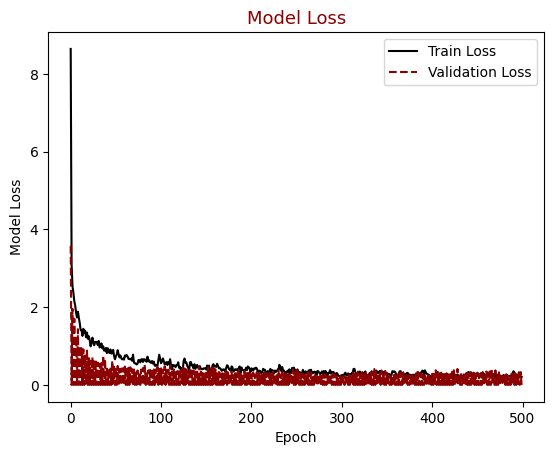

In [13]:
plt.figure()
plt.plot(hist.history["loss"],label = "Train Loss", color = "black")
plt.plot(hist.history["val_loss"],label = "Validation Loss", color = "darkred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Loss", color = "darkred", size = 13)
plt.xlabel("Epoch")
plt.ylabel("Model Loss")
plt.legend()
plt.savefig("/mnt/d/BDA602/model_loss_plot_InceptionV3.png")
plt.show()

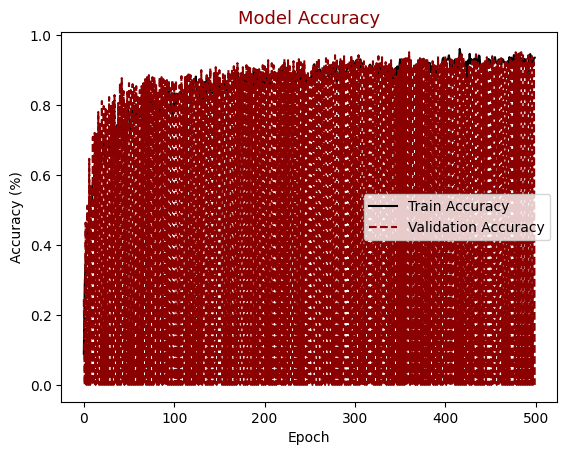

In [14]:
plt.figure()
plt.plot(hist.history["accuracy"], label="Train Accuracy", color="black")
plt.plot(hist.history["val_accuracy"], label="Validation Accuracy", color="darkred", linestyle="dashed", markeredgecolor="purple", markeredgewidth=2)
plt.title("Model Accuracy", color="darkred", size=13)
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.savefig("/mnt/d/BDA602/model_accuracy_plot_InceptionV3.png")
plt.show()

In [16]:
test_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc * 100, '%')

Found 359 images belonging to 36 classes.
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 881ms/step - accuracy: 0.9346 - loss: 0.4043
Test accuracy: 94.70751881599426 %
